# From Clicks to Conversions: Understanding User Behavior on theLook ECommerce Site


Team members: Camila Daza, Jasmine Gohil, JIACHENG LI, Olivia Peng, Oumou Barry, Priyanka Bharat Chaudhari

**Tableau Dashboard Link:** [Click Here](https://public.tableau.com/views/FromClickstoConversionsTheLookEcommerceWebsite_17022542193610/FromClickstoConversions?:language=en-US&:display_count=n&:origin=viz_share_link)

# Executive Summary

This report seeks to analyze profitability, operations, customer behavior, and website traffic with a focus on enhancing overall business efficiency and customer engagement.
Our customer analysis reveals that we have a broad and diverse user base spread across different geographical locations.  In order to boost user engagement, we suggest localized promotions in Shanghai and Beijing. Gen X and Millennials are identified as digital leaders, prompting marketing strategies targeting those segments.

Regarding our exploration of sales, we noticed that The Look website exhibits strong financial health through the company’s consistent rise in revenue and profit. In order to maintain long term profitability we suggest a sales focus on top brand-centric promotions with Carhartt and Tommy Hilfiger.

Additionally, our examination of the ecommerce’s operations highlights TheLook’s effective inventory management with a focus on seasonal demand and strategic logistics choices. Chicago and Houston distribution centers play pivotal roles, supported by dynamic inventory adjustments and effective backorder management.To enhance operational efficiency we suggest a potential expansion of distribution centers in China, Brazil, and the UK and a focus on strategic hubs in the US.

Finally, our website traffic analysis emphasized the importance of digital channels such as Youtube, email and organic sources. For website traffic optimization, we suggest  channel-specific campaigns for categories with high conversion rates such as Adwords and email  and A/B testing for Youtube and Facebook.


**Table of Contents**

I. Introduction

II. Data

   A. Entity Relationship Diagram

   B. Data Exploration/Cleaning

III. Customer Analysis

   A. Demographics

   B. Sales

IV. Operations

   A. Inventory

   B. Logistics/Transportation
   
V. Website Traffic

VI. Visualizations
   
VII. Challenges

VIII. Conclusions

IX. Business Implications

X. References

# I. Introduction

**Business Problem:**

The dataset offered by TheLook eCommerce is a valuable resource for gaining insights into e-commerce dynamics.
Our mission involves exploring data, evaluating profitability, analyzing customer behavior, optimizing product performance, and enhancing operational efficiency by looking over inventory management, channels, and logistics performance. Our goal is to effectively segment customers, devise inventory management strategies, and optimize distribution routes by utilizing this data. We analyze website traffic, purchase history, and geography to develop targeted strategies. These resolutions, directly tied to enhancing customer satisfaction, driving sales, and increasing brand loyalty, emphasize the importance of leveraging data-driven insights to make informed decisions aligning with the company's strategic goals. Our aim is to unlock the potential of digital commerce trends, guiding TheLook towards strategic growth in a competitive landscape.


**Motivation:**

E-commerce has revolutionized shopping by allowing online transactions that break down physical trade barriers. Even though the dataset we have for TheLook is simulated, it contains valuable customer information and product insights, enabling us to make data-driven decisions and dwell deeper into the latest digital commerce and consumer behavior trends


**Data Source**:

 theLook eCommerce - Google Cloud. Direct access [link text](https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce)

# II. Data

## A. Entity Relationship Diagram

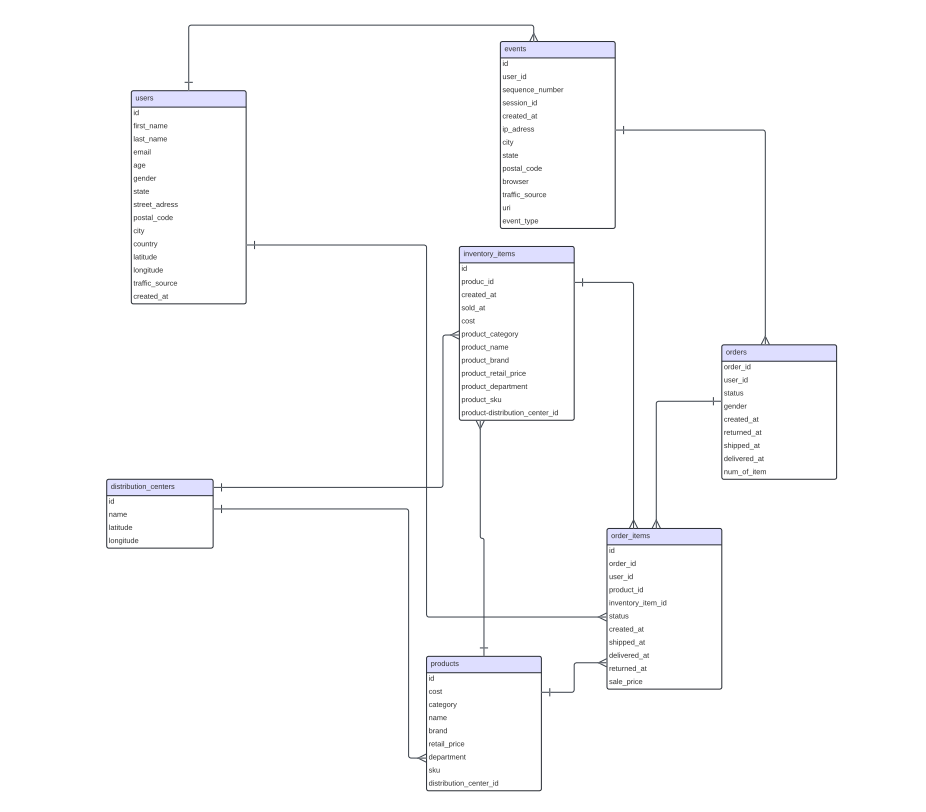

**Order Items Table**:
- Many-to-One relationship with orders table.Each order item in the Order Items table is associated with one order in the Orders table, but each order in the Orders table can have multiple order items.
- Many-to-One Relationship with the Users Table.Each order item in the Order Items table is associated with one user in the Users table, but each user in the Users table can have multiple order items.
- Many-to-One Relationship with Products Table:
Each order item in the Order Items table is associated with one product in the Products table, but each product in the Products table can be associated with multiple order items.

**Inventory Items Table**:
- Many-to-One Relationship with Products Table:
Each inventory item in the Inventory Items table is associated with one product in the Products table, but each product in the Products table can have multiple inventory items.
- Many-to-One Relationship with Distribution Centers Table:
Each inventory item in the Inventory Items table is associated with one distribution center in the Distribution Centers table, but each distribution center can have multiple inventory items.

**Users Table**
- One-to-Many Relationship with Events Table:
Each user in the Users table can have multiple events in the Events table, but each event is associated with only one user.
- One-to-Many Relationship with Orders Table:
Each user in the Users table can place multiple orders in the Orders table, but each order is associated with only one user.
- One-to-Many Relationship with Order Items Table:
Each user in the Users table can have multiple order items in the Order Items table, but each order item is associated with only one user.

**Distribution Centers Table**
- One-to-Many Relationship with Products Table:
Each distribution center in the Distribution Centers table can have multiple products in the Products table, but each product is associated with only one distribution center.


## B. Data Exploration/Cleaning

**Loading Tables**

In [ ]:
%%bigquery
# Load distribution centers
SELECT * FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [ ]:
%%bigquery
# Load events
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.events`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1527422,<NA>,3,e430f881-10e7-4818-8c9d-44f35297e4cb,2021-05-19 04:37:00+00:00,206.189.105.68,Sapporo,Hokkaido,005-0849,Chrome,Adwords,/cancel,cancel
1,1920537,<NA>,3,b465f1fc-59cd-4366-a7a3-2816dbc3d2b4,2020-10-06 06:00:00+00:00,183.224.126.73,Sapporo,Hokkaido,005-0861,Chrome,Email,/cancel,cancel
2,1735108,<NA>,3,1178041e-ef1a-45c5-a739-d4ce9ed4f5bf,2020-07-12 01:28:00+00:00,115.59.29.144,Morioka City,Iwate,020-0866,Other,Email,/cancel,cancel
3,1708436,<NA>,3,1a74cf74-deaa-4075-a745-f511741ff3c6,2021-05-03 01:00:00+00:00,176.56.84.117,São Paulo,São Paulo,02220-000,Chrome,Facebook,/cancel,cancel
4,2329612,<NA>,3,48b363dc-eef2-4697-8d87-57e5cc0ecc22,2019-02-07 14:20:00+00:00,126.15.207.150,São Paulo,São Paulo,02675-031,Chrome,Organic,/cancel,cancel


In [ ]:
%%bigquery
# Load inventory_items
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,29254,13844,2023-10-15 12:43:57.904432+00:00,2023-12-09 17:20:57.904432+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,29255,13844,2021-06-18 03:07:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,29256,13844,2023-02-07 11:10:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,45815,13844,2022-08-26 13:14:07+00:00,2022-09-16 16:31:07+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,45816,13844,2022-02-18 06:11:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [ ]:
%%bigquery
# Load orders
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,2,2,Cancelled,F,2023-03-10 15:30:00+00:00,NaT,NaT,NaT,2
1,13,12,Cancelled,F,2023-10-30 14:21:00+00:00,NaT,NaT,NaT,1
2,27,22,Cancelled,F,2021-10-25 02:42:00+00:00,NaT,NaT,NaT,3
3,37,29,Cancelled,F,2021-05-19 00:54:00+00:00,NaT,NaT,NaT,1
4,63,53,Cancelled,F,2023-12-05 04:50:00+00:00,NaT,NaT,NaT,1


In [ ]:
%%bigquery
# Load order_items
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.order_items`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,59531,41151,32907,14235,161066,Cancelled,2023-11-11 03:23:06+00:00,NaT,NaT,NaT,0.02
1,62894,43509,34717,14235,170184,Cancelled,2023-12-08 06:45:31+00:00,NaT,NaT,NaT,0.02
2,48256,33276,26644,14235,130531,Complete,2023-07-15 11:01:50+00:00,2023-07-15 15:05:00+00:00,2023-07-18 14:25:00+00:00,NaT,0.02
3,92265,63717,50915,14235,249397,Complete,2023-09-16 03:00:35+00:00,2023-09-12 15:03:00+00:00,2023-09-15 18:15:00+00:00,NaT,0.02
4,156744,108189,86391,14235,423209,Complete,2023-04-21 02:15:08+00:00,2023-04-18 19:59:00+00:00,2023-04-19 21:26:00+00:00,NaT,0.02


In [ ]:
%%bigquery
# Load users
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.users`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,11439,Elizabeth,Miller,elizabethmiller@example.org,44,F,Acre,697 Julia Mill Suite 225,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-06-14 15:07:00+00:00
1,16706,Logan,Powell,loganpowell@example.net,19,M,Acre,4537 Michael Ways Apt. 664,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2019-12-01 04:40:00+00:00
2,18807,Carrie,English,carrieenglish@example.com,27,F,Acre,8585 Todd Road,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-10-12 18:57:00+00:00
3,21494,Ricky,Taylor,rickytaylor@example.net,42,M,Acre,93317 Morris Cliff Apt. 808,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Facebook,2019-03-30 09:34:00+00:00
4,23680,Eric,Poole,ericpoole@example.org,14,M,Acre,16798 Kevin Route,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2021-07-09 03:05:00+00:00


In [ ]:
%%bigquery
# Load products
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.products`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


First, we loaded each table in the dataset to observe our data.

**Duplicates/Unique Primary Keys**

In [ ]:
%%bigquery
# Check if primary key is unique for distribution_centers table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,id,f0_


In [ ]:
%%bigquery
# Check if id is unique for events table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.events`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;


Query is running:   0%|          |

Downloading: |          |

,id,f0_


In [ ]:
%%bigquery
# Check if id unique for inventory_items table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,id,f0_


In [ ]:
%%bigquery
# Check if id is unique for order_items table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.order_items`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,id,f0_


In [ ]:
%%bigquery
# Check if order_id unique for orders table
SELECT order_id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.orders`
GROUP BY order_id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,order_id,f0_


In [ ]:
%%bigquery
# Check if id is unique for products table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.products`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,id,f0_


In [ ]:
%%bigquery
# Check if id is unique for users table
SELECT id, COUNT(*)
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY id
HAVING COUNT(*) > 1
LIMIT 1000;

Query is running:   0%|          |

Downloading: |          |

,id,f0_


Then, for each table we checked if its id is a primary key (if it is unique). As shown above, all ids are unique in their respective tables. Therefore, we should not worry about duplicate observations.

**Missing Values**

In [ ]:
%%bigquery
# Order_items table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_order_items_id,
  COUNT(CASE WHEN order_id IS NULL THEN 1 END) AS null_order_id,
  COUNT(CASE WHEN user_id IS NULL THEN 1 END) AS null_user_id,
  COUNT(CASE WHEN product_id IS NULL THEN 1 END) AS null_product_id,
  COUNT(CASE WHEN inventory_item_id IS NULL THEN 1 END) AS null_inventory_item_id,
  COUNT(CASE WHEN status IS NULL THEN 1 END) AS null_status,
  COUNT(CASE WHEN created_at IS NULL THEN 1 END) AS null_created_at,
  COUNT(CASE WHEN shipped_at IS NULL THEN 1 END) AS null_shipped_at,
  COUNT(CASE WHEN delivered_at IS NULL THEN 1 END) AS null_delivered_at,
  COUNT(CASE WHEN returned_at IS NULL THEN 1 END) AS null_returned_at,
  COUNT(CASE WHEN sale_price IS NULL THEN 1 END) AS null_sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_order_items_id,null_order_id,null_user_id,null_product_id,null_inventory_item_id,null_status,null_created_at,null_shipped_at,null_delivered_at,null_returned_at,null_sale_price
0,0,0,0,0,0,0,0,63598,118166,163373,0


In [ ]:
%%bigquery
# Orders table
SELECT
  COUNT(CASE WHEN order_id IS NULL THEN 1 END) AS null_order_id,
  COUNT(CASE WHEN user_id IS NULL THEN 1 END) AS null_user_id,
  COUNT(CASE WHEN status IS NULL THEN 1 END) AS null_status,
  COUNT(CASE WHEN gender IS NULL THEN 1 END) AS null_gender,
  COUNT(CASE WHEN created_at IS NULL THEN 1 END) AS null_created_at,
  COUNT(CASE WHEN returned_at IS NULL THEN 1 END) AS null_returned_at,
  COUNT(CASE WHEN shipped_at IS NULL THEN 1 END) AS null_shipped_at,
  COUNT(CASE WHEN delivered_at IS NULL THEN 1 END) AS null_delivered_at,
  COUNT(CASE WHEN num_of_item IS NULL THEN 1 END) AS null_num_of_item
FROM `bigquery-public-data.thelook_ecommerce.orders`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_order_id,null_user_id,null_status,null_gender,null_created_at,null_returned_at,null_shipped_at,null_delivered_at,null_num_of_item
0,0,0,0,0,0,112699,43936,81450,0


In [ ]:
%%bigquery
# Inventory_items table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_id,
  COUNT(CASE WHEN product_id IS NULL THEN 1 END) AS null_product_id,
  COUNT(CASE WHEN created_at IS NULL THEN 1 END) AS null_created_at,
  COUNT(CASE WHEN sold_at IS NULL THEN 1 END) AS null_sold_at,
  COUNT(CASE WHEN cost IS NULL THEN 1 END) AS null_cost,
  COUNT(CASE WHEN product_category IS NULL THEN 1 END) AS null_product_category,
  COUNT(CASE WHEN product_name IS NULL THEN 1 END) AS null_product_name,
  COUNT(CASE WHEN product_brand IS NULL THEN 1 END) AS null_product_brand,
  COUNT(CASE WHEN product_retail_price IS NULL THEN 1 END) AS null_product_retail_price,
  COUNT(CASE WHEN product_department IS NULL THEN 1 END) AS null_product_department,
  COUNT(CASE WHEN product_sku IS NULL THEN 1 END) AS null_product_sku,
  COUNT(CASE WHEN product_distribution_center_id IS NULL THEN 1 END) AS null_product_distribution_center_id
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_id,null_product_id,null_created_at,null_sold_at,null_cost,null_product_category,null_product_name,null_product_brand,null_product_retail_price,null_product_department,null_product_sku,null_product_distribution_center_id
0,0,0,0,309001,0,0,0,0,0,0,0,0


In [ ]:
%%bigquery
# Distribution_centers table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_id,
  COUNT(CASE WHEN name IS NULL THEN 1 END) AS null_name,
  COUNT(CASE WHEN latitude IS NULL THEN 1 END) AS null_latitude,
  COUNT(CASE WHEN longitude IS NULL THEN 1 END) AS null_longitude
FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`;


Query is running:   0%|          |

Downloading:   0%|          |

,null_id,null_name,null_latitude,null_longitude
0,0,0,0,0


In [ ]:
%%bigquery
# Events table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_id,
  COUNT(CASE WHEN user_id IS NULL THEN 1 END) AS null_user_id,
  COUNT(CASE WHEN sequence_number IS NULL THEN 1 END) AS null_sequence_number,
  COUNT(CASE WHEN session_id IS NULL THEN 1 END) AS null_session_id,
  COUNT(CASE WHEN created_at IS NULL THEN 1 END) AS null_created_at,
  COUNT(CASE WHEN ip_address IS NULL THEN 1 END) AS null_ip_address,
  COUNT(CASE WHEN city IS NULL THEN 1 END) AS null_city,
  COUNT(CASE WHEN state IS NULL THEN 1 END) AS null_state,
  COUNT(CASE WHEN postal_code IS NULL THEN 1 END) AS null_postal_code,
  COUNT(CASE WHEN browser IS NULL THEN 1 END) AS null_browser,
  COUNT(CASE WHEN traffic_source IS NULL THEN 1 END) AS null_traffic_source,
  COUNT(CASE WHEN uri IS NULL THEN 1 END) AS null_uri,
  COUNT(CASE WHEN event_type IS NULL THEN 1 END) AS null_event_type
FROM `bigquery-public-data.thelook_ecommerce.events`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_id,null_user_id,null_sequence_number,null_session_id,null_created_at,null_ip_address,null_city,null_state,null_postal_code,null_browser,null_traffic_source,null_uri,null_event_type
0,0,1123646,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%bigquery
# Products table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_id,
  COUNT(CASE WHEN cost IS NULL THEN 1 END) AS null_cost,
  COUNT(CASE WHEN category IS NULL THEN 1 END) AS null_category,
  COUNT(CASE WHEN name IS NULL THEN 1 END) AS null_name,
  COUNT(CASE WHEN brand IS NULL THEN 1 END) AS null_brand,
  COUNT(CASE WHEN retail_price IS NULL THEN 1 END) AS null_retail_price,
  COUNT(CASE WHEN department IS NULL THEN 1 END) AS null_department,
  COUNT(CASE WHEN sku IS NULL THEN 1 END) AS null_sku,
  COUNT(CASE WHEN distribution_center_id IS NULL THEN 1 END) AS null_distribution_center_id
FROM `bigquery-public-data.thelook_ecommerce.products`;


Query is running:   0%|          |

Downloading:   0%|          |

,null_id,null_cost,null_category,null_name,null_brand,null_retail_price,null_department,null_sku,null_distribution_center_id
0,0,0,0,2,24,0,0,0,0


In [ ]:
%%bigquery
# Users table
SELECT
  COUNT(CASE WHEN id IS NULL THEN 1 END) AS null_id,
  COUNT(CASE WHEN first_name IS NULL THEN 1 END) AS null_first_name,
  COUNT(CASE WHEN last_name IS NULL THEN 1 END) AS null_last_name,
  COUNT(CASE WHEN email IS NULL THEN 1 END) AS null_email,
  COUNT(CASE WHEN age IS NULL THEN 1 END) AS null_age,
  COUNT(CASE WHEN gender IS NULL THEN 1 END) AS null_gender,
  COUNT(CASE WHEN state IS NULL THEN 1 END) AS null_state,
  COUNT(CASE WHEN street_address IS NULL THEN 1 END) AS null_street_address,
  COUNT(CASE WHEN postal_code IS NULL THEN 1 END) AS null_postal_code,
  COUNT(CASE WHEN city IS NULL THEN 1 END) AS null_city,
  COUNT(CASE WHEN country IS NULL THEN 1 END) AS null_country,
  COUNT(CASE WHEN latitude IS NULL THEN 1 END) AS null_latitude,
  COUNT(CASE WHEN longitude IS NULL THEN 1 END) AS null_longitude,
  COUNT(CASE WHEN traffic_source IS NULL THEN 1 END) AS null_traffic_source,
  COUNT(CASE WHEN created_at IS NULL THEN 1 END) AS null_created_at
FROM `bigquery-public-data.thelook_ecommerce.users`;



Query is running:   0%|          |

Downloading:   0%|          |

,null_id,null_first_name,null_last_name,null_email,null_age,null_gender,null_state,null_street_address,null_postal_code,null_city,null_country,null_latitude,null_longitude,null_traffic_source,null_created_at
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We then checked if there are missing values.The distribution_centers and users tables do not have any null values.The order_items table has 63179 null values in shipped_at, 117552 in delivered_at, and 162481 in returned_at. The orders table has 43555 null value in shipped_at, 80828 in delivered_at, and 111979 in returned_at.The inventory_items table has 308539 null values for the sold at column. There are 1125557 missing user ids in the events table. Finally, 2 missing product names and 24 missing brand names in the products table.

Although some columns have a lot of missing values, we believe that it is missing for valid reasons and that imputing would tamper with our data integrity. For example, a missing value in returned_at means that the product was not returned which is a possible scenario. Therefore, we decided that our strategy to handle missing values is to filter them out in our queries as a safeguard.


**Data Types**

**Events**

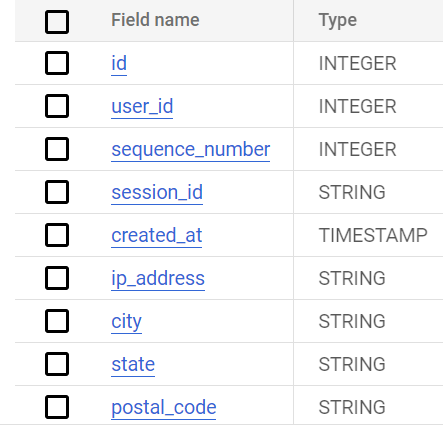  

**Products**

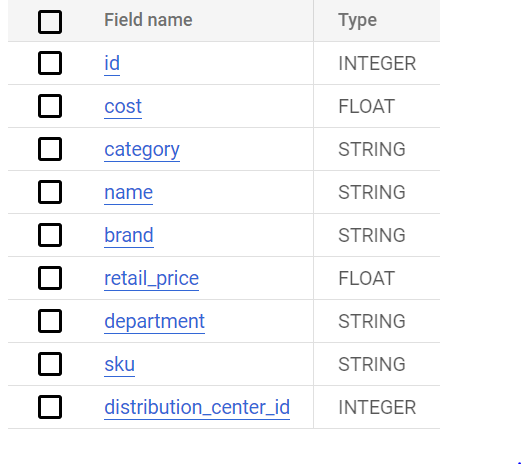

**Inventory_items**

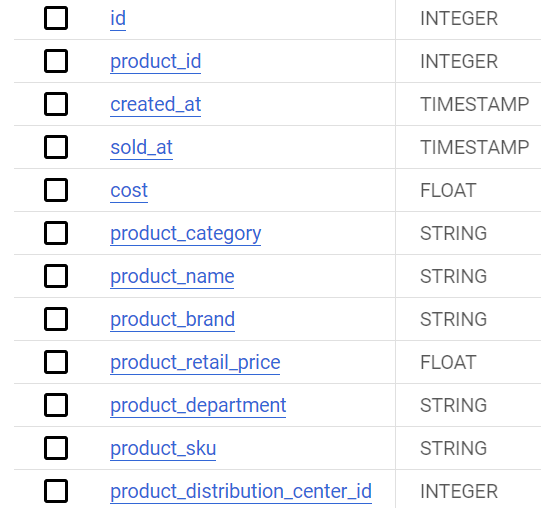

**Users**

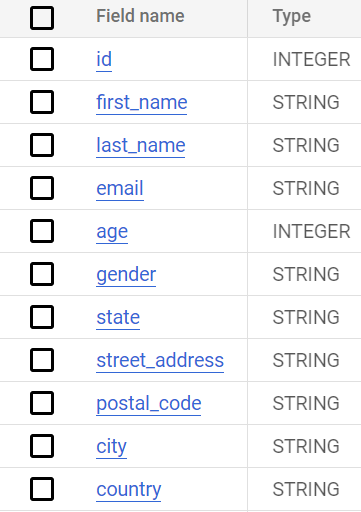

**Distribution Centers**

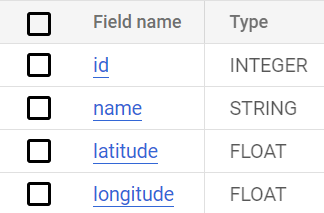

**order_items table**


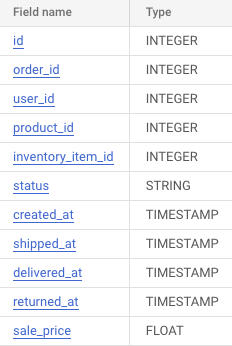

**order table**



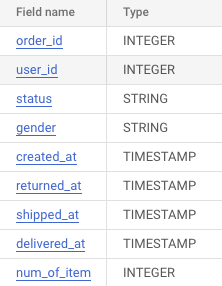

# III. Customer Analysis

## A. Demographics

**Q1: How is the user base distributed across the different countries?**

In [ ]:
%%bigquery
SELECT country, COUNT(DISTINCT id) AS distinct_user_count #selected all the distinct countries from the country column
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE country IS NOT NULL
GROUP BY country
ORDER BY distinct_user_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,country,distinct_user_count
0,China,33965
1,United States,22508
2,Brasil,14667
3,South Korea,5354
4,France,4634
5,United Kingdom,4441
6,Germany,4187
7,Spain,4038
8,Japan,2473
9,Australia,2227


**A1:** The user base is predominantly distributed across different regions. China leads with over 34,000 users, followed by the United States with 22,256 users, and Brazil with 14,769 users. These figures indicate diverse levels of online presence, with Asia and North America boasting the highest user numbers, succeeded by South America, Europe, and finally, Oceania.

**Q2: How is it distributed across cities?**

In [ ]:
%%bigquery
SELECT
  country,
  city,
  COUNT(DISTINCT id) AS distinct_user_count,
  MAX(latitude) AS city_latitude,
  MAX(longitude) AS city_longitude
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE city IS NOT NULL
GROUP BY country, city
ORDER BY distinct_user_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,country,city,distinct_user_count,city_latitude,city_longitude
0,China,Shanghai,2482,44.927481,127.177810
1,China,Beijing,2161,46.428891,126.985981
2,South Korea,Seoul,1474,37.685694,127.173084
3,China,Shenzhen,1311,43.867197,126.611892
4,China,Dongguan,954,47.360661,123.901924
...,...,...,...,...,...
7993,France,Trilbardou,1,48.919739,2.802879
7994,France,Chauconin-Neufmontiers,1,48.968343,2.844198
7995,France,Quincy-Voisins,1,48.889035,2.866042
7996,France,Guérard,1,48.861376,2.951296


**A2:** Even though the top three countries where the users are located are China, the United States and Brazil, the top three cities from where they are Shanghai and Beijing in China, and Seoul in South Korea. The city in the USA where most customers are located is New York City.

**Q3: What is the breakdown of user identification by gender?**

In [ ]:
%%bigquery
SELECT gender, COUNT(DISTINCT id) AS distinct_user_count #selected and counted the distinct genders from the gender column
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE gender IN ('M', 'F')
GROUP BY gender
ORDER BY distinct_user_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,gender,distinct_user_count
0,M,50068
1,F,49932


**A3**: The user base is fairly evenly split, with approximately 50.06% identifying as male and 49.94% as female.

**Q4: Are certain age groups more prominent than others?**

In [ ]:
%%bigquery
SELECT
  CASE
    WHEN age <= 18 THEN 'Under 18' #created different 'buckets' for the different age ranges
    WHEN age BETWEEN 18 AND 24 THEN '18-24'
    WHEN age BETWEEN 25 AND 34 THEN '25-34'
    WHEN age BETWEEN 35 AND 44 THEN '35-44'
    WHEN age BETWEEN 45 AND 54 THEN '45-54'
    WHEN age BETWEEN 55 AND 64 THEN '55-64'
    WHEN age >= 65 THEN '65+'
  END AS age_group,
  COUNT(DISTINCT id) AS distinct_user_count #then counted how many users fell into each of our age groups
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY age_group
ORDER BY age_group;

Query is running:   0%|          |

Downloading:   0%|          |

,age_group,distinct_user_count
0,18-24,9993
1,25-34,17037
2,35-44,17138
3,45-54,16871
4,55-64,17006
5,65+,10116
6,Under 18,11839


**A4**:The age distribution in our data reveals that the age groups "25-34", "35-44", and "45-54" have the highest user counts compared to other age groups. Additionally, there is a significant presence of youth, with both the "18-24" and "under 18" categories collectively surpassing 22,000 users. This data indicates that the platform attracts a diverse user base spanning a wide age range, encompassing both younger and older individuals.

**Q5: What are the most popular traffic sources?**

In [ ]:
%%bigquery
SELECT traffic_source, COUNT(*) as source_count
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY traffic_source
ORDER BY source_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,source_count
0,Search,70084
1,Organic,14858
2,Facebook,6140
3,Email,4952
4,Display,3966


**A5:** The data sources for the users are Search, Organic, Facebook, Email and Display, with the most popular ones being Search and Organic. This means that the vast majority of the users are finding Thelook by searching a keyword in a search engine like Google, for example.

**Q6: How long does it take users to make their first purchase after creating an accounts?**

In [ ]:
%%bigquery
WITH UserFirstOrder AS (
SELECT user_id, MIN(created_at) AS first_order_time
FROM `bigquery-public-data.thelook_ecommerce.orders` o
GROUP BY user_id
)
SELECT
    u.id AS user_id,
    u.created_at AS account_creation_time,
    ufo.first_order_time,
    TIMESTAMP_DIFF(ufo.first_order_time, u.created_at, MINUTE) AS time_diff_minutes,  #used ChatGPT for help to extract the minutes from the creation of the account to the creation of the order
FROM `bigquery-public-data.thelook_ecommerce.users` u
JOIN UserFirstOrder ufo ON u.id = ufo.user_id
ORDER BY time_diff_minutes DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,user_id,account_creation_time,first_order_time,time_diff_minutes
0,57827,2019-01-05 09:26:00+00:00,2023-12-03 09:26:00+00:00,2581920
1,10081,2019-01-04 15:05:00+00:00,2023-11-30 15:05:00+00:00,2579040
2,50457,2019-01-08 03:33:00+00:00,2023-11-29 03:33:00+00:00,2571840
3,23524,2019-01-15 02:20:00+00:00,2023-12-05 02:20:00+00:00,2570400
4,98847,2019-01-02 07:39:00+00:00,2023-11-17 07:39:00+00:00,2563200
...,...,...,...,...
80130,69127,2023-12-08 14:50:35.798057+00:00,2023-12-09 14:50:35.798057+00:00,1440
80131,62444,2019-02-24 12:23:00+00:00,2019-02-25 12:23:00+00:00,1440
80132,89689,2023-12-07 16:22:17.257946+00:00,2023-12-08 16:22:17.257946+00:00,1440
80133,80929,2023-12-09 14:47:44.762992+00:00,2023-12-10 14:47:44.762992+00:00,1440


**A6:** From these results, we found that the least amount of time a user spent in between creating an account and placing an order was one day, and that the longest amount of time was 4.8 years.

## B. Sales

**i. Product/Brands Performance**


**Q1: How much revenue is generated by each brand ?**





In [ ]:
%%bigquery

WITH BrandRevenue AS (
  SELECT
    p.brand AS brand,
    SUM(oi.sale_price * o.num_of_item) AS total_revenue
  FROM
    `bigquery-public-data.thelook_ecommerce.order_items` oi
  JOIN
    `bigquery-public-data.thelook_ecommerce.products` p
  ON
    oi.product_id = p.id
  JOIN
    `bigquery-public-data.thelook_ecommerce.orders` o
  ON
    oi.order_id = o.order_id
  GROUP BY
    brand
)

SELECT
  brand,
  total_revenue
FROM
  BrandRevenue
ORDER BY
  total_revenue DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,brand,total_revenue
0,Calvin Klein,376830.510985
1,Diesel,369972.349754
2,Carhartt,352076.937397
3,True Religion,348305.319167
4,7 For All Mankind,339696.990814
...,...,...
2748,Sock Company,7.200000
2749,Extenders,7.000000
2750,Lorraine,7.000000
2751,Made in USA,3.430000


**B1**:The top 10 brands by revenue in the dataset are led by Carhartt, generating a total revenue of approximately USD 333,401.12. Following closely is 7 For All Mankind with a revenue of USD 321,927.46, and Tommy Hilfiger securing the third position with USD 214,643.70 in total revenue. Other notable brands contributing significantly to the overall revenue include Volcom, Columbia, and Ray-Ban, each showcasing their popularity and sales performance. These insights provide valuable information for businesses to understand the market dynamics and customer preferences, allowing them to make informed decisions to enhance their product strategies and brand positioning.

**Q2:How frequently do customers make repeat purchases for each
brand?**

In [ ]:
%%bigquery
-- Selecting distinct product brands and counting the number of loyal customers for each brand
SELECT
    DISTINCT(p.product_brand),
    COUNT(DISTINCT o.user_id) AS loyal_customer_count
FROM
    bigquery-public-data.thelook_ecommerce.inventory_items p
    -- Joining inventory_items with order_items on product_id
    JOIN bigquery-public-data.thelook_ecommerce.order_items o ON p.product_id = o.product_id
-- Filtering out returned orders
WHERE
    o.returned_at IS NOT NULL
-- Grouping results by product brand
GROUP BY
    p.product_brand
-- Ordering results by loyal_customer_count in descending order
ORDER BY
    loyal_customer_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,product_brand,loyal_customer_count
0,Allegra K,612
1,Calvin Klein,301
2,Carhartt,301
3,Hanes,186
4,Nautica,181
...,...,...
2055,FREEGUN,1
2056,Players,1
2057,Robinson Apparel,1
2058,SEOBEAN,1


**B2:** From the analysis, we can identify and quantify loyal customers based on returned orders. Loyal customers are those who have made repeat transactions, indicating repeated engagement with the brand. In the insights, Allegra K has the highest count of loyal customers, indicating a strong customer base that has engaged with the brand through return transactions. This may be indicative of positive brand perception and customer satisfaction.

**Q3. What percentage of sales result in returned items?**

In [ ]:
%%bigquery
SELECT COUNT(DISTINCT returned_at) / COUNT(DISTINCT order_id) AS return_rate
FROM bigquery-public-data.thelook_ecommerce.orders;

Query is running:   0%|          |

Downloading:   0%|          |

,return_rate
0,0.100616


**B3:** From the analysis, the return rate of 10.08% suggests that, on average, around 10.08% of orders in the dataset have been returned. A higher return rate may indicate customer dissatisfaction, product quality issues, or mismatches between customer expectations and delivered products. Monitoring return rates is crucial for businesses to understand customer satisfaction and identify areas for improvement. A high return rate may lead to increased operational costs, loss of revenue, and potential damage to the brand's reputation.

**ii.Profitability**

**Q1: What is the annual breakdown of revenue, cost, and profit?**


In [ ]:
%%bigquery
# step 5: extract the fields I need: 'year', 'revenue = order_items_count*sale_price BY year' , 'cost= order_items_count*cost' , 'profit = revenue - cost'
SELECT * , ROUND((revenue-cost),2) AS profit
# step 4: extract the fields I need: 'year', 'revenue = order_items_count*sale_price BY year' , 'cost= order_items_count*cost'
FROM (
SELECT year , ROUND(SUM(order_items_count*sale_price),2) AS revenue , ROUND(SUM(order_items_count
*cost),2) AS cost
# step 3: merge two tables together-> fields: 'year','product_id', 'order_items_count BY YEAR', 'sale_price', 'cost'
FROM (SELECT year_and_order_items_count.*, distinct_productid_sales_price.sale_price , distinct_productid_cost.cost AS cost
# step 1: make a table which only include 'year','product_id', and 'order_items_count BY YEAR'(this is a new column I create)
FROM (SELECT EXTRACT (YEAR from created_at) AS year,product_id, COUNT(product_id) AS order_items_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled') # threshold: WHERE status NOT IN ('Returned','Cancelled'), those items are not considered as sold and therefore they are not included in the revenue calculation.
GROUP BY year , product_id
ORDER BY year) AS year_and_order_items_count
# step 2: make a table which only include 'DISTINCT product_id', and corresponding 'sales price'
LEFT JOIN (SELECT DISTINCT product_id , sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_productid_sales_price
ON year_and_order_items_count.product_id = distinct_productid_sales_price.product_id
# step 2: make a table related to 'DISTINCT product_id' and 'cost'
LEFT JOIN (SELECT DISTINCT id, cost
FROM `bigquery-public-data.thelook_ecommerce.products`) AS distinct_productid_cost
ON year_and_order_items_count.product_id = distinct_productid_cost.id)
GROUP BY year # care about the 'yearly' condition, so only group by year
ORDER BY year
);

Query is running:   0%|          |

Downloading:   0%|          |

,year,revenue,cost,profit
0,2019,172425.99,82946.36,89479.63
1,2020,589088.72,282066.50,307022.22
2,2021,1134328.22,545976.51,588351.71
3,2022,2010319.31,967106.26,1043213.05
4,2023,4207060.53,2022549.17,2184511.36


**B1**: Analyzing the trend over the past few years reveals a steady incline in both revenue and profit. Although the complete dataset for 2023 is not yet available, the consistent pattern observed in previous years leads to a compelling guess that the ascending trend of revenue and profit is likely to persist into 2023.

**Q2: What is the monthly breakdown of revenue, cost, and profit?**

In [ ]:
%%bigquery
# step 5: extract the fields I need: 'year','month', and 'revenue = 'order_items_count*sale_price BY YEAR & MONTH', 'cost','profit'
SELECT *, ROUND((revenue-cost),2) AS profit
# step 4: extract the fields I need: 'year','month', 'revenue = 'order_items_count*sale_price BY YEAR & MONTH', 'cost'
FROM (SELECT year , month, ROUND(SUM(order_items_count*sale_price),2) AS revenue , ROUND(SUM(order_items_count*cost),2) AS cost
# step 3: merge two tables together-> fields: 'year','month','product_id', 'order_items_count BY YEAR & MONTH', 'sale_price', and 'cost'
FROM (SELECT year_and_order_items_count.*, distinct_productid_sales_price.sale_price , distinct_productid_cost.cost
# step 1: make a table which only include 'year','month','product_id', and 'order_items_count BY YEAR & MONTH'(this is a new column I create)
FROM (SELECT EXTRACT (YEAR from created_at) AS year,EXTRACT(MONTH from created_at) AS month ,product_id, COUNT(product_id) AS order_items_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled') # threshold: WHERE status NOT IN ('Returned','Cancelled'), those items are not considered as sold and therefore, they are not included in the revenue calculation
GROUP BY year ,month, product_id
ORDER BY year, month) AS year_and_order_items_count
# step 2: make a table which only include 'DISTINCT product_id', and corresponding 'sales price'
LEFT JOIN (SELECT DISTINCT product_id , sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_productid_sales_price
ON year_and_order_items_count.product_id = distinct_productid_sales_price.product_id
# step 2: make a table related to 'DISTINCT product_id' and 'cost'
LEFT JOIN (SELECT DISTINCT id, cost
FROM `bigquery-public-data.thelook_ecommerce.products`) AS distinct_productid_cost
ON year_and_order_items_count.product_id = distinct_productid_cost.id)
GROUP BY year,month
ORDER BY year,month);

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,revenue,cost,profit
0,2019,1,712.51,337.03,375.48
1,2019,2,4006.48,1820.17,2186.31
2,2019,3,7181.85,3440.21,3741.64
3,2019,4,5752.40,2762.49,2989.91
4,2019,5,9573.78,4631.82,4941.96
5,2019,6,12124.05,5802.25,6321.80
6,2019,7,18607.88,8796.96,9810.92
7,2019,8,18451.42,8884.48,9566.94
8,2019,9,22821.78,11071.85,11749.93
9,2019,10,22911.06,11039.99,11871.07


**B2**:The data shows a consistent increase in revenue, costs, and profit over the months and years. It's evident that from 2022 to 2023, there's a substantial growing trend in all three areas. This pronounced positive phenomenon means a steady and progressive financial advancement the company has experienced during this period.

**Q3: How have sales trends evolved over different time intervals?**

In [ ]:
%%bigquery
-- Extracting the year and month from the 'created_at' timestamp and calculating the total sales
-- by joining order_items with orders on order_id
SELECT
    EXTRACT(YEAR FROM oi.created_at) AS year,
    EXTRACT(MONTH FROM oi.created_at) AS month,
    SUM(oi.sale_price) AS total_sales
FROM
    bigquery-public-data.thelook_ecommerce.order_items AS oi
JOIN
    bigquery-public-data.thelook_ecommerce.orders AS o
    ON oi.order_id = o.order_id
-- Filtering out orders with NULL 'created_at' timestamps
WHERE
    o.created_at IS NOT NULL
-- Grouping results by year and month
GROUP BY
    year, month
-- Ordering results by year and month
ORDER BY
    year, month;


Query is running:   0%|          |

Downloading:   0%|          |

,year,month,total_sales
0,2019,1,857.980001
1,2019,2,4479.989996
2,2019,3,9409.340008
3,2019,4,8096.390018
4,2019,5,12915.590018
5,2019,6,16002.290007
6,2019,7,22753.329990
7,2019,8,23321.530030
8,2019,9,28328.120031
9,2019,10,31026.409970


**B3**:The analyses provide insights into the sales performance over time, allowing you to make informed decisions regarding marketing strategies, inventory management, and overall business planning. From the insights, we can say that there is a consistent upward trend in sales from January 2022 to September 2022, indicating strong growth over this period. As well as October 2022 and November 2023 stand out as the top-performing months with significantly higher sales. Also when compared sales in the same months across different years to assess year-over-year growth, the sales in October 2023 are substantially higher than the same month in 2022.

**Q4: What kind of distribution can we get from the revenue percentiles and
average revenue?**



In [ ]:
%%bigquery
WITH percentile AS (WITH bucket1 AS (SELECT user_product_id.user_id, user_product_id.product_id ,distinct_product_sale_price.sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS user_product_id
LEFT JOIN (SELECT DISTINCT product_id,sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_product_sale_price
ON user_product_id.product_id = distinct_product_sale_price.product_id
WHERE status NOT IN ('Returned','Cancelled')
)
SELECT user_id, ROUND(SUM(sale_price),2) AS revenue_per_user
FROM bucket1
GROUP BY user_id
ORDER BY revenue_per_user DESC)

SELECT
  ROUND(APPROX_QUANTILES(revenue_per_user, 100)[25], 2) AS revenue_p25, # calculate the revenue percentile = 25%
  ROUND(APPROX_QUANTILES(revenue_per_user, 100)[50], 2) AS revenue_p50, # calculate the revenue percentile = 50%
  ROUND(APPROX_QUANTILES(revenue_per_user, 100)[75], 2) AS revenue_p75, # calculate the revenue percentile = 75%

  ROUND(AVG(revenue_per_user), 2) AS avg_revenue # calculate the average revenue
FROM percentile;

Query is running:   0%|          |

Downloading:   0%|          |

,revenue_p25,revenue_p50,revenue_p75,avg_revenue
0,39.0,79.95,163.01,122.57


**B4:**The result shows various revenue percentiles (25th, 50th, and 75th) and the average revenue. 25% of users generate revenue below 39.26, while 50% generate revenue below 79.99. Additionally, 75% of users contribute revenue below 163.95. The average revenue stands at 122.26. From the results obtained, it is highly probable that the distribution graph will display a right-skewed distribution. This skewness indicates that most users fall within the lower revenue brackets, while a smaller number of users contribute significantly higher revenues. This aligns with the results obtained from the previous question.

**Q5: What is the overall yearly revenue growth?**

In [ ]:
%%bigquery
-- Extracting the year from the 'created_at' timestamp and calculating the monthly revenue
-- for orders with a status other than 'Returned' or 'Cancelled'
SELECT
    EXTRACT(YEAR FROM created_at) AS year,
    SUM(sale_price) AS monthly_revenue
FROM
    bigquery-public-data.thelook_ecommerce.order_items
-- Filtering out orders with 'Returned' or 'Cancelled' status
WHERE
    status NOT IN ('Returned', 'Cancelled')
-- Grouping results by year
GROUP BY
    year
-- Ordering results by year
ORDER BY
    year;


Query is running:   0%|          |

Downloading:   0%|          |

,year,monthly_revenue
0,2019,1.724260e+05
1,2020,5.890887e+05
2,2021,1.134328e+06
3,2022,2.010319e+06
4,2023,4.207061e+06


**B5:**There is a consistent upward trend in yearly revenue from 2019 to 2023. The revenue more than doubled from 2019 to 2020, and substantial growth continued in subsequent years.

**Q6: What is the trend in Average Revenue per Unit (ARPU) by year?**

In [ ]:
%%bigquery
# step 1: make a temporary financial statement that only include revenue, cost, and profit
WITH financial_statement AS (
  SELECT * , ROUND((revenue-cost),2) AS profit
FROM (
SELECT year , ROUND(SUM(order_items_count*sale_price),2) AS revenue , ROUND(SUM(order_items_count
*cost),2) AS cost
FROM (SELECT year_and_order_items_count.*, distinct_productid_sales_price.sale_price , distinct_productid_cost.cost AS cost
FROM (SELECT EXTRACT (YEAR from created_at) AS year,product_id, COUNT(product_id) AS order_items_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled')
GROUP BY year , product_id
ORDER BY year) AS year_and_order_items_count
LEFT JOIN (SELECT DISTINCT product_id , sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_productid_sales_price
ON year_and_order_items_count.product_id = distinct_productid_sales_price.product_id
LEFT JOIN (SELECT DISTINCT id, cost
FROM `bigquery-public-data.thelook_ecommerce.products`) AS distinct_productid_cost
ON year_and_order_items_count.product_id = distinct_productid_cost.id)
GROUP BY year
ORDER BY year
))
# step 3: make a new column which include the info of ARPU
SELECT financial_statement.* , ROUND((revenue / year_user_count),2) AS ARPU
FROM financial_statement
# step 2: calculate the count of distinct user_id so it can be use as denominator of ARPU
INNER JOIN (SELECT EXTRACT (YEAR from created_at) AS year , COUNT(DISTINCT user_id) AS year_user_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled')
GROUP BY year) AS customer_count
ON customer_count.year = financial_statement.year
ORDER BY year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,revenue,cost,profit,ARPU
0,2019,172425.99,82946.36,89479.63,89.90
1,2020,589088.72,282066.50,307022.22,92.39
2,2021,1134328.22,545976.51,588351.71,94.81
3,2022,2010319.31,967106.26,1043213.05,98.71
4,2023,4207060.53,2022549.17,2184511.36,110.33


**B6:**The result shows a consistent increase in ARPU from 91.98 to 109.3 over the years, indicating a positive trend in the average revenue generated per unit. This suggests a potential growth in revenue from each unit sold annually.

**Q7: What is the trend in Average Revenue per Unit (ARPU) by month?**

In [ ]:
%%bigquery
# step 1: make a temporary financial statement that only include monthly revenue, cost, and profit
WITH financial_statement AS(SELECT *, ROUND((revenue-cost),2) AS profit
FROM (SELECT year , month, ROUND(SUM(order_items_count*sale_price),2) AS revenue , ROUND(SUM(order_items_count*cost),2) AS cost
FROM (SELECT year_and_order_items_count.*, distinct_productid_sales_price.sale_price , distinct_productid_cost.cost
FROM (SELECT EXTRACT (YEAR from created_at) AS year,EXTRACT(MONTH from created_at) AS month ,product_id, COUNT(product_id) AS order_items_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled')
GROUP BY year ,month, product_id
ORDER BY year, month) AS year_and_order_items_count
LEFT JOIN (SELECT DISTINCT product_id , sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_productid_sales_price
ON year_and_order_items_count.product_id = distinct_productid_sales_price.product_id
LEFT JOIN (SELECT DISTINCT id, cost
FROM `bigquery-public-data.thelook_ecommerce.products`) AS distinct_productid_cost
ON year_and_order_items_count.product_id = distinct_productid_cost.id)
GROUP BY year,month
ORDER BY year,month))
# step 3: make a new column which include the info of ARPU
SELECT financial_statement.* , ROUND((revenue / year_month_user_count),2) AS ARPU
FROM financial_statement
# step 2: calculate the count of distinct user_id so it can be use as denominator of ARPU
INNER JOIN (SELECT EXTRACT (YEAR from created_at) AS year , EXTRACT(MONTH from created_at) AS month, COUNT(DISTINCT user_id) AS year_month_user_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status NOT IN ('Returned','Cancelled')
GROUP BY year,month ) AS customer_count
ON customer_count.year = financial_statement.year and financial_statement.month = customer_count.month
ORDER BY year,month;

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,revenue,cost,profit,ARPU
0,2019,1,712.51,337.03,375.48,59.38
1,2019,2,4006.48,1820.17,2186.31,111.29
2,2019,3,7181.85,3440.21,3741.64,93.27
3,2019,4,5752.40,2762.49,2989.91,76.70
4,2019,5,9573.78,4631.82,4941.96,69.38
5,2019,6,12124.05,5802.25,6321.80,84.78
6,2019,7,18607.88,8796.96,9810.92,100.58
7,2019,8,18451.42,8884.48,9566.94,84.64
8,2019,9,22821.78,11071.85,11749.93,92.77
9,2019,10,22911.06,11039.99,11871.07,79.83


**B7:** The general ARPU hovers between 80 and 90, except for the notable increase in February 2019 and November 2023, peaking at 120.11 and 105.99, respectively. This suggests potential seasonal variations or specific events impacting revenue. This cyclical trend hints at seasonal impacts or strategic marketing efforts that might influence customer spending behavior, providing insights into opportune times for effective marketing strategies or promotions.

**Q8: How does the count of users distribute across different revenue groups? (break it into three groups: 'low-revenue user', 'mid-revenue user', and 'high-revenue user'.)**

In [ ]:
%%bigquery

# step 3: see the counts of each revenue group
                                    # step 1: make a 'user_id', 'revenue_per_user' table
WITH bucket3 AS (WITH bucket2 AS (WITH bucket1 AS (SELECT user_product_id.user_id, user_product_id.product_id ,distinct_product_sale_price.sale_price
                  # step 2: add the label
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS user_product_id
LEFT JOIN (SELECT DISTINCT product_id,sale_price
FROM `bigquery-public-data.thelook_ecommerce.order_items`) AS distinct_product_sale_price
ON user_product_id.product_id = distinct_product_sale_price.product_id
WHERE status NOT IN ('Returned','Cancelled')
)
SELECT user_id, ROUND(SUM(sale_price),2) AS revenue_per_user
FROM bucket1
GROUP BY user_id
ORDER BY revenue_per_user DESC)
SELECT bucket2.*,CASE WHEN revenue_per_user <= 500 THEN 'Low-revenue users' WHEN (500 < revenue_per_user AND  revenue_per_user <=1000) THEN 'Mid-revenue users' ELSE 'High-revenue users' END AS revenue_group
FROM bucket2)
SELECT revenue_group , COUNT(revenue_group) AS count_revenue_group
FROM bucket3
GROUP BY revenue_group;

Query is running:   0%|          |

Downloading:   0%|          |

,revenue_group,count_revenue_group
0,Low-revenue users,64992
1,High-revenue users,102
2,Mid-revenue users,1101


**B8:** The Low-revenue user category comprises the majority of the user base, which is significantly higher than the Mid and High-revenue user groups. However, even though the Mid and High-revenue user groups are significantly fewer in number, they may contribute even higher revenue. This data provides a valuable incentive to delve deeper into the behavior and preferences of users within each revenue group. By understanding the distinct characteristics and needs of these segments, it becomes possible to develop more precise marketing strategies. This approach aims to optimize revenue by focusing on the smaller yet high-value user segmentation. This could also potentially lead to more effective and targeted marketing initiatives or personalized offerings.

# IV. Operations

## A. Inventory Management


**Q1: What is the status of the products' inventory? What is the total stock, what is in stock and how many products are sold?**

In [ ]:
%%bigquery

#(1.) BY COUNT

# Step 1 - Creating a Common Table Expression (CTE) called as Inventory_status and selecting the product id, product name, product department
WITH inventory_status AS ( SELECT product_id, product_name, product_category, product_department,
# Using case when clause, for selecting rows where products are sold or in stock, if a cell is null then the product is in stock and if the cell is not null then product is sold
   SUM(CASE WHEN sold_at IS NULL THEN 1 ELSE 0 END) AS in_stock,
   SUM(CASE WHEN sold_at IS NOT NULL THEN 1 ELSE 0 END) AS sold
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
# Group by product id, product name, product category, product department
GROUP BY product_id, product_name, product_category, product_department)
# Step 2 - Selecting the columns from the table i.e. inventory status we created
SELECT i.product_id, i.product_name,i.product_category, i.product_department, t.total_products, i.in_stock, i.sold
FROM inventory_status i
# We created a new subquery for calculating total products, which is the count of the product id. Then we joint that product id with the product id of the inventory status table
JOIN (SELECT product_id, COUNT(*) AS total_products
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY product_id) t ON i.product_id = t.product_id
# Order by items sold in descending order to see which products are sold the most
ORDER BY i.sold DESC;

#(2.) BY CATEGORY

# Step 1 - Creating a Common Table Expression (CTE) called as Inventory_status and selecting the product id and product category
WITH inventory_status AS (SELECT product_id, product_category,
# Using case when clause, for selecting rows where products are sold or in stock, if a cell is null then the product is in stock and if the cell is not null then product is sold
   SUM(CASE WHEN sold_at IS NULL THEN 1 ELSE 0 END) AS in_stock,
    SUM(CASE WHEN sold_at IS NOT NULL THEN 1 ELSE 0 END) AS sold
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
# Group by product id, product name, product category, product category
GROUP BY product_id, product_category)

# Step 2 - Selecting the columns from the table i.e. inventory status we created by suming them because we need the aggregates of the total products, in stock and sold items
SELECT i.product_category,SUM(t.total_products) AS total_products, SUM(i.in_stock) AS in_stock, SUM(i.sold) AS sold
FROM inventory_status i
# We created a new subquery for calculating total products, which is the count of the product id. Then we joint that product id with the product id of the inventory status table
JOIN (SELECT product_id, COUNT(*) AS total_products
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY product_id) t
ON i.product_id = t.product_id
# Group by product category because we want the total sum of total product, in stock and sold items by category
GROUP BY i.product_category
# Order by items sold in descending order to see which products are sold the most
ORDER BY SUM(i.sold) DESC;

#(3.) BY DEPARTMENT

# Step 1 - Creating a Common Table Expression (CTE) called as Inventory_status and selecting the product and product department
WITH inventory_status AS (SELECT product_id, product_department,
# Using case when clause, for selecting rows where products are sold or in stock, if a cell is null then the product is in stock and if there cell is not null then product is sold
    SUM(CASE WHEN sold_at IS NULL THEN 1 ELSE 0 END) AS in_stock,
    SUM(CASE WHEN sold_at IS NOT NULL THEN 1 ELSE 0 END) AS sold
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
# Group by product id, product name, product category, product department
GROUP BY product_id, product_department)

# Step 2 - Selecting the columns from the table i.e. inventory status we created by suming them because we need the aggregates of the total products, in stock and sold items
SELECT i.product_department,SUM(t.total_products) AS total_products, SUM(i.in_stock) AS in_stock, SUM(i.sold) AS sold
FROM inventory_status i
# We created a new subquery for calculating total products, which is the count of the product id. Then we joint that product id with the product id of the inventory status table
JOIN (SELECT product_id, COUNT(*) AS total_products
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY product_id) t
ON i.product_id = t.product_id
# Group by product category because we want the total sum of total product, in stock and sold items by department
GROUP BY i.product_department
# Order by items sold in descending order to see which products are sold the most
ORDER BY SUM(i.sold) DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,product_department,total_products,in_stock,sold
0,Women,246625,155430,91195
1,Men,244016,153571,90445


**A1:** The presented table/query provides insights into the current status of our inventory. The 'Total Products' column signifies the overall quantity of products, while the 'In Stock' column indicates those presently available for purchase. Conversely, the 'Sold' column represents items that have already been sold. This table reveals a dynamic spectrum in inventory status. Deliberate adjustments in stock levels are made based on factors such as seasonal demand and ongoing trends. Products with lower demand, influenced by seasonal variations or current trends, are intentionally maintained at lower stock levels. Conversely, high-demand products are strategically stocked in greater quantities to meet customer preferences

**Q2: What is the inventory turnover in days?**

In [ ]:
%%bigquery

# Selecting the id, product_name, and calculating the difference between the days the product was created and sold by using Timestamp_diff
SELECT id,product_name, product_category, product_department, TIMESTAMP_DIFF(MAX(sold_at), MIN(created_at), DAY) AS turnover_days
# Selecting the above columns from the inventory items table
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
# DATA CLEANING and filtering the columns sold_at and created_at. We select the IS NOT NULL for sold_at column because the rows where there are null values means that the product is not sold yet
WHERE sold_at IS NOT NULL AND created_at IS NOT NULL
# Group by id and product name
GROUP BY id, product_name, product_category, product_department
# Order by turnover_days DESC
ORDER BY turnover_days DESC

Query is running:   0%|          |

Downloading:   0%|          |

,id,product_name,product_category,product_department,turnover_days
0,60188,100% Silk Woven Navy Striped Tie,Accessories,Men,59
1,259612,180s Women's Lush Ear Warmer,Accessories,Women,59
2,349799,80's - 80's -'Club' - Half frame Clear Lens Wa...,Accessories,Women,59
3,346017,Aegean Wool Greek Fisherman Cap,Accessories,Men,59
4,372648,Aegean Wool Greek Fisherman Cap,Accessories,Men,59
...,...,...,...,...,...
181635,429771,Stacy Adams Underwear Men's Regular Boxer Short,Underwear,Men,0
181636,118842,Swan Men's Fleece-Line Crew Neck Long Sleeves ...,Underwear,Men,0
181637,262240,Tommy Bahama Men's Holiday Escape Boxer Short,Underwear,Men,0
181638,408951,Wolverine Men's Performance Base Layer Bottom,Underwear,Men,0


**A2:** The inventory turnover was calculated by measuring the time elapsed between the order creation (created_at) and the moment of sale. Remarkably, we observed a diverse range of turnover days, with the highest recorded at 59 days, suggesting a more extended sales cycle for some products. Additionally, there are instances of products achieving a turnover of 0 days, indicating that certain items were sold on the same day they were stocked.

**Q3: What are the most returned items? (1.) by counts (2.) brand (3.) by category**

In [ ]:
%%bigquery
# (1.) by counts
# step 3: make a table which include 'brand','product name','category','department','returned_count'
SELECT product_info.* EXCEPT (id), product_returned_count.returned_count
# step 1: make a table which only include 'product_id', and 'count of status == returned'
FROM (SELECT product_id, COUNT(status) AS returned_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Returned'
GROUP BY product_id) AS product_returned_count
# step 2: make a table which only include 'id as product id', 'brand', 'name', 'category','department'
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_returned_count.product_id = product_info.id
ORDER BY product_returned_count.returned_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,brand,name,category,department,returned_count
0,Calvin Klein,Infinite Sheer - Sheer-to-Waist Pantyhose,Socks & Hosiery,Women,5
1,Quiksilver,Quiksilver Men's Lead Pill Tee,Tops & Tees,Men,5
2,Harbor Bay,Harbor Bay Big & Tall 2-Pack Color Boxer Briefs,Underwear,Men,5
3,Hampton Direct,Dual Sided Eye Care Case (Blue),Accessories,Women,5
4,Van Heusen,Van Heusen Men's Fitted Dress Shirt,Tops & Tees,Men,5
...,...,...,...,...,...
13569,The North Face,The North Face Apex Bionic Mens Soft Shell Ski...,Outerwear & Coats,Men,1
13570,The North Face,The North Face Nuptse 2 Jacket - Noah Green/TN...,Outerwear & Coats,Men,1
13571,Quiksilver,Quiksilver Men's Rockefeller Walkshort,Shorts,Men,1
13572,The North Face,The North Face Apex Bionic Soft Shell Jacket -...,Outerwear & Coats,Men,1


In [ ]:
%%bigquery
#(2.) by brand
SELECT brand , SUM(returned_count) AS returned_count
FROM (
SELECT product_info.* EXCEPT (id), product_returned_count.returned_count
FROM (SELECT product_id, COUNT(status) AS returned_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Returned'
GROUP BY product_id) AS product_returned_count
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_returned_count.product_id = product_info.id)
GROUP BY brand
ORDER BY returned_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,brand,returned_count
0,Allegra K,621
1,Calvin Klein,307
2,Carhartt,302
3,Hanes,186
4,Nautica,181
...,...,...
2055,Mara Hoffman,1
2056,GUESS by Marciano,1
2057,Magaschoni,1
2058,NAU,1


In [ ]:
%%bigquery
#(3.) by category
SELECT category , SUM(returned_count) AS returned_count
FROM (
SELECT product_info.* EXCEPT (id), product_returned_count.returned_count
FROM (SELECT product_id, COUNT(status) AS returned_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Returned'
GROUP BY product_id) AS product_returned_count
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_returned_count.product_id = product_info.id
)
GROUP BY category
ORDER BY returned_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,category,returned_count
0,Intimates,1327
1,Jeans,1242
2,Tops & Tees,1209
3,Fashion Hoodies & Sweatshirts,1201
4,Shorts,1175
5,Sweaters,1157
6,Sleep & Lounge,1133
7,Swim,1109
8,Accessories,1041
9,Active,919


**A3:** The count data reveals that return rates are higher in Men's Tops & Tees and Underwear categories, which suggests potential sizing or satisfaction issues. Allegra K is the leading brand in inventory among the top returned data. The last, categories data, 'Intimates and Jeans,' show higher return counts, indicating possible size discrepancies or dissatisfaction.

**Q4: What are the most canceled items? (1.) by counts (2.) brand (3.) by category**

In [ ]:
%%bigquery
# (1.) by counts
# step 3: make a table which include 'brand','product name','category','department','cancelled_count'
SELECT product_info.* EXCEPT (id), product_Cancelled_count.Cancelled_count
# step 1: make a table which only include 'product_id', and 'count of status == cancelled'
FROM (SELECT product_id, COUNT(status) AS Cancelled_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Cancelled'
GROUP BY product_id) AS product_Cancelled_count
# step 2: make a table which only include 'id as product id', 'brand', 'name', 'category','department'
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_Cancelled_count.product_id = product_info.id
ORDER BY product_Cancelled_count.Cancelled_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,brand,name,category,department,Cancelled_count
0,Canada Goose,Canada Goose Men's Citadel Parka,Outerwear & Coats,Men,7
1,Just My Size,JMS Comfort Top Legging - 89003,Plus,Women,6
2,Hatley,Hatley Fly By The Seat Of Your Pants Men's Boxers,Underwear,Men,6
3,Colorado Timberline,Colorado Timberline Dillon Microfiber Mock T S...,Active,Men,6
4,Robert Graham,Robert Graham Men's Corinthian,Socks,Men,6
...,...,...,...,...,...
17619,Jordan,Nike Jordan Retro 11 Bred Bootie Socks,Socks,Men,1
17620,The North Face,The North Face Apex Bionic Jacket - Men's,Outerwear & Coats,Men,1
17621,Nobis,Nobis Yatesy Parka,Outerwear & Coats,Men,1
17622,Alpha Industries,Darla,Outerwear & Coats,Men,1


In [ ]:
%%bigquery
# (2.) by brand
SELECT brand , SUM(Cancelled_count) AS Cancelled_count
FROM (
SELECT product_info.* EXCEPT (id), product_Cancelled_count.Cancelled_count
FROM (SELECT product_id, COUNT(status) AS Cancelled_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Cancelled'
GROUP BY product_id) AS product_Cancelled_count
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_Cancelled_count.product_id = product_info.id)
GROUP BY brand
ORDER BY Cancelled_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,brand,Cancelled_count
0,Allegra K,925
1,Calvin Klein,475
2,Carhartt,405
3,Hanes,305
4,Nautica,293
...,...,...
2285,Cluny,1
2286,Vivienne Westwood,1
2287,ILSE JACOBSEN,1
2288,Unicorn London,1


In [ ]:
%%bigquery
# (3.) by category
SELECT category , SUM(Cancelled_count) AS Cancelled_count
FROM (
SELECT product_info.* EXCEPT (id), product_Cancelled_count.Cancelled_count
FROM (SELECT product_id, COUNT(status) AS Cancelled_count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE status = 'Cancelled'
GROUP BY product_id) AS product_Cancelled_count
LEFT JOIN (SELECT DISTINCT id ,brand,name,category,department
FROM `bigquery-public-data.thelook_ecommerce.products`) AS product_info
on product_Cancelled_count.product_id = product_info.id
)
GROUP BY category
ORDER BY Cancelled_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,category,Cancelled_count
0,Intimates,2038
1,Jeans,1979
2,Fashion Hoodies & Sweatshirts,1763
3,Tops & Tees,1752
4,Sweaters,1711
5,Swim,1679
6,Shorts,1646
7,Sleep & Lounge,1646
8,Accessories,1470
9,Active,1399


**A4:** The cancellation data points to some interesting trends in various areas. It seems that comfy wear, like lounge and sleep items for men, has more cancellations, maybe due to sizing or comfort issues. Among brands, Allegra K is at the top of the cancellation list, raising questions about their quality such as comfort. Intimates and Jeans are more frequently canceled, this result is the same as returned data, indicating potential issues with style or fit.

**Q5: What is the backorder rate and how well is the inventory aligned with customer demand?**

In [ ]:
%%bigquery

# Step 1 - Create a Common Table Expression named OrderSummary to calculate customer demand and in stock from two different tables
WITH OrderSummary AS (
    SELECT
        o.product_id,
        i.product_name,
        i.product_id AS inventory_product_id,
# Counting the orders for each product
        COUNT(*) AS customer_demand,
# Finding the number of products in stock by using Case when clause, here if the cell in sold column is null then the product is in stock because there is no entry for sold at
        SUM(CASE WHEN i.sold_at IS NULL THEN 1 ELSE 0 END) AS in_stock
    FROM
        `bigquery-public-data.thelook_ecommerce.order_items` o
# Joining the order_items and inventory_items on product id, order_items was used to calculate customer demand and inventory items was used to calculate in stock items
    JOIN
        `bigquery-public-data.thelook_ecommerce.inventory_items` i ON o.product_id = i.product_id
# To calculate backorder items, we need the status to be processing because hese statuses often indicate that the order is in progress but has not been shipped or delivered yet.
    WHERE status = "Processing"
# We group by product id from inventory items table and order items table and product name from the iventory items table
    GROUP BY
        o.product_id, i.product_id, i.product_name)

# Selecting the columns from the OrderSummary table we created
SELECT
    os.product_name,
    os.customer_demand,
    os.in_stock,
# Putting a case when clause to find the backordered items, which is if customer demand is more than in stock then customer demand - the in stock will give us the backordered item. Here the demand is more than the stock
    CASE WHEN os.customer_demand > os.in_stock THEN os.customer_demand - os.in_stock ELSE 0 END AS backordered_items
FROM
    OrderSummary os
# Arranging the results in descending order of backordered items to find out the highest backordered products
ORDER BY backordered_items DESC

Query is running:   0%|          |

Downloading:   0%|          |

,product_name,customer_demand,in_stock,backordered_items
0,Majestic International Men's Weather Wise Flan...,329,203,126
1,Knit Boxer,287,175,112
2,Royal Bones Plaid Overdye Super Skinny Pants,258,168,90
3,Feelmax Basic Toe Sock Red/White Men's Shoe Si...,234,144,90
4,Calvin Klein Sportswear Men's Transitional Cot...,245,155,90
...,...,...,...,...
20751,Elan Gauzes Pants,4,3,1
20752,Tankini Swimsuit Set Gingham Top & Bottom Black,2,1,1
20753,Ladies Purple Black Plaid Button-Down 2 Pocket...,2,1,1
20754,Fruit of the Loom Men's 4-Pack Stripe/Solid As...,2,1,1


**A5:** A backorder represents the unfulfilled demand for a product, and its calculation involves assessing the gap between customer demand and the quantity of the product currently in stock. Effective backorder management is essential for maintaining customer satisfaction and making informed business decisions. Winter clothing products are experiencing higher backorders.

## B. Logistics/Transportation

**Q1:Where are distribution centers located?**


In [ ]:
%%bigquery
# Splitting the name column to get cities and states in separate columns for easier future joins
SELECT id,
  TRIM(REGEXP_REPLACE(name, r' [^ ]+$', '')) AS city, #ChatGPT for regular expression matching
  REGEXP_EXTRACT(name, r' ([^ ]+)$') AS state,
   latitude,longitude
FROM
  `bigquery-public-data.thelook_ecommerce.distribution_centers`;

Query is running:   0%|          |

Downloading:   0%|          |

,id,city,state,latitude,longitude
0,1,Memphis,TN,35.1174,-89.9711
1,2,Chicago,IL,41.8369,-87.6847
2,3,Houston,TX,29.7604,-95.3698
3,4,Los Angeles,CA,34.0500,-118.2500
4,5,New Orleans,LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey,NY/NJ,40.6340,-73.7834
6,7,Philadelphia,PA,39.9500,-75.1667
7,8,Mobile,AL,30.6944,-88.0431
8,9,Charleston,SC,32.7833,-79.9333
9,10,Savannah,GA,32.0167,-81.1167


**B1:** Distribution centers are strategically located across the United States. In the Midwest, there is a center in Chicago, IL. Moving southward, distribution centers serve key areas such as Houston, TX, New Orleans, LA, Mobile, AL, Charleston, SC, and Savannah, GA. On the West Coast, Los Angeles, CA, hosts another distribution center. In the Northeast, distribution centers are situated in the Port Authority of New York/New Jersey, NY/NJ, and Philadelphia, PA. These centers play a vital role in facilitating efficient distribution and logistics operations throughout the country.

Gen AI (Chat GPT) was used for the regular expression that matches states and cities' names.

**Q2: How many customers live in a city where there is a distribution center?**

In [ ]:
%%bigquery
# Getting the information from the modified distribution center table
WITH new_distribution_centers AS (
  SELECT
    id,
    TRIM(REGEXP_REPLACE(name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(name, r' ([^ ]+)$') AS state,
    latitude,
    longitude
  FROM
    `bigquery-public-data.thelook_ecommerce.distribution_centers`
)

# Selecting columns of interest in the users and distribution_centers tables
SELECT
  MAX(centers.id) AS distribution_center_id,centers.city,
  centers.state, count(distinct users.id) as nearby_customers
FROM
  new_distribution_centers AS centers

--Joining the distribution_centers and users tables
JOIN
  `bigquery-public-data.thelook_ecommerce.users` AS users
ON
  centers.city = users.city

# Filtering for US only because all distribution centers are located in the US
WHERE
  users.country = 'United States'

# Grouping and ranking by number of customers in the city
group by centers.city,centers.state
order by nearby_customers desc;

Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,city,state,nearby_customers
0,3,Houston,TX,388
1,4,Los Angeles,CA,387
2,2,Chicago,IL,250
3,7,Philadelphia,PA,138
4,1,Memphis,TN,60
5,10,Savannah,GA,20
6,8,Mobile,AL,13
7,9,Charleston,SC,12
8,5,New Orleans,LA,4


**B2:** The customer distribution around various distribution centers showcases significant engagement in key cities. Los Angeles, CA, leads with 378 nearby customers, followed closely by Houston, TX, with 347. Chicago, IL, maintains a strong presence with 238 customers. Philadelphia, PA, records 133 nearby residents, while Memphis, TN, has 58. The centers in Savannah, GA, Mobile, AL, and Charleston, SC, serve 19, 12, and 12 customers, respectively. New Orleans, LA, completes the overview with four nearby customers. This analysis provides valuable insights into the local impact and reach of distribution centers in meeting customer demands. This information could also enhance targeted marketing efforts and advertisement to clients located near those booming warehouses.

**Q3: How many orders does each distribution center fulfill?**


In [ ]:
%%bigquery
# Querying distribution_centers and inventory_items and joining them to retrieve relevant information
WITH DistributionCenterOrders AS (
  SELECT
    dc.id AS distribution_center_id,
    TRIM(REGEXP_REPLACE(dc.name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(dc.name, r' ([^ ]+)$') AS state,
    oi.order_id
  FROM
    `bigquery-public-data.thelook_ecommerce.inventory_items` AS ii
  JOIN
    `bigquery-public-data.thelook_ecommerce.distribution_centers` AS dc
  ON
    ii.product_distribution_center_id = dc.id
  JOIN
    `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  ON
    oi.product_id = ii.product_id
)

# Getting columns of interest from the CTE
SELECT
  distribution_center_id,
  city,
  state,
  COUNT(DISTINCT order_id) AS orders_fulfilled
FROM
  DistributionCenterOrders
# Grouping and ranking by number of orders
GROUP BY
  distribution_center_id, city, state
ORDER BY
  orders_fulfilled DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,city,state,orders_fulfilled
0,1,Memphis,TN,22838
1,2,Chicago,IL,22776
2,3,Houston,TX,21665
3,8,Mobile,AL,17437
4,4,Los Angeles,CA,16714
5,7,Philadelphia,PA,16031
6,9,Charleston,SC,15932
7,6,Port Authority of New York/New Jersey,NY/NJ,15896
8,5,New Orleans,LA,12454
9,10,Savannah,GA,11627


**B3:** The order fulfillment dynamics across distribution centers highlight Chicago, IL, as a key hub, processing 22,771 orders, closely followed by Houston, TX, with 21,574. Mobile, AL, contributes significantly with 17,524 orders, and Los Angeles, CA, records 16,713 orders. Philadelphia, PA, and Charleston, SC, fulfill 16,176 and 15,960 orders, respectively. The Port Authority of New York/New Jersey, NY/NJ, handles 15,485 orders, and New Orleans, LA, fulfills 12,627 orders. Savannah, GA, completes the overview with 11,437 orders. This concise analysis provides essential insights into order processing dynamics across distribution centers, aiding in strategic optimization efforts.This could help allow the company to identify high traffic centers and order inventoory accordingly.

**Q4: How many products are shipped from each distribution center?**

In [ ]:
%%bigquery
# Querying distribution_centers and inventory_items and joining them to retrieve relevant information
WITH DistributionCenterProducts AS (
  SELECT
    dc.id AS distribution_center_id,
    TRIM(REGEXP_REPLACE(dc.name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(dc.name, r' ([^ ]+)$') AS state,
    oi.product_id
  FROM
    `bigquery-public-data.thelook_ecommerce.inventory_items` AS ii
  JOIN
    `bigquery-public-data.thelook_ecommerce.distribution_centers` AS dc
  ON
    ii.product_distribution_center_id = dc.id
  JOIN
    `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  ON
    oi.product_id = ii.product_id
)

# Getting columns of interest from the CTE
SELECT
  distribution_center_id,
  city,
  state,
  COUNT(DISTINCT product_id) AS products_shipped
FROM
  DistributionCenterProducts

# Grouping and ranking by number of shipped products
GROUP BY
  distribution_center_id, city, state
ORDER BY
  products_shipped DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,city,state,products_shipped
0,2,Chicago,IL,3918
1,1,Memphis,TN,3880
2,3,Houston,TX,3651
3,8,Mobile,AL,2917
4,4,Los Angeles,CA,2756
5,9,Charleston,SC,2708
6,7,Philadelphia,PA,2666
7,6,Port Authority of New York/New Jersey,NY/NJ,2571
8,5,New Orleans,LA,2105
9,10,Savannah,GA,1875


**B4:** Examining product shipments from distribution centers reveals dynamic supply chain operations. Chicago, IL, leads with 3,915 products, closely followed by Memphis, TN, with 3,883. Houston, TX, maintains a strong presence with 3,661 shipments. Mobile, AL, dispatches 2,909 products, while Los Angeles, CA, and Charleston, SC, contribute significantly with 2,756 and 2,713, respectively. Philadelphia, PA, and the Port Authority of New York/New Jersey, NY/NJ, handle 2,664 and 2,568 shipments. New Orleans, LA, dispatches 2,108 products, and Savannah, GA, completes the overview with 1,877 shipments. This concise analysis sheds light on the product shipment dynamics, offering insights for logistical optimization. This could inform fulfillment decisions when ordering inventory.

**Q5: What is the most ordered product at each distribution center ?**

In [ ]:
%%bigquery
WITH DistributionCenterBestSellers AS (
  SELECT
    dc.id AS distribution_center_id,
    TRIM(REGEXP_REPLACE(dc.name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(dc.name, r' ([^ ]+)$') AS state,
    oi.product_id,
    COUNT(oi.order_id) AS order_count,
    RANK() OVER (PARTITION BY dc.id ORDER BY COUNT(oi.order_id) DESC) AS rnk
  FROM
    `bigquery-public-data.thelook_ecommerce.inventory_items` AS ii
  JOIN
    `bigquery-public-data.thelook_ecommerce.distribution_centers` AS dc
  ON
    ii.product_distribution_center_id = dc.id
  JOIN
    `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  ON
    oi.product_id = ii.product_id
  GROUP BY
    distribution_center_id, city, state, oi.product_id
)

SELECT
  distribution_center_id,
  city,
  state,
  product_id,
  MAX(product_name) AS product_name,
  MAX(order_count) AS order_count
FROM
  (
    SELECT
      db.*,
      p.name AS product_name
    FROM
      DistributionCenterBestSellers db
    JOIN
      `bigquery-public-data.thelook_ecommerce.products` AS p
    ON
      db.product_id = p.id
  ) subquery
WHERE
  rnk = 1
GROUP BY
  distribution_center_id, city, state, product_id
ORDER BY
  distribution_center_id, order_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,city,state,product_id,product_name,order_count
0,1,Memphis,TN,23742,Canada Goose Men's Citadel Parka,882
1,2,Chicago,IL,11661,Jezebel Women's Show Off Camisole,950
2,3,Houston,TX,18835,Calvin Klein Sportswear Men's Transitional Cot...,882
3,4,Los Angeles,CA,20297,Khaki Checker Formal Vest for Men Patterned fo...,782
4,5,New Orleans,LA,696,Lucky Brand Women's Ethereal Lace Neckline Tee,799
5,6,Port Authority of New York/New Jersey,NY/NJ,27087,Hanro Men's Madison Long Woven Pajama Gift Set,748
6,7,Philadelphia,PA,17680,Metal Mulisha Men's Contender,645
7,8,Mobile,AL,26505,Nautica Men's Charlestown Sleep Pant,756
8,9,Charleston,SC,5675,Allegra K Women Drawstring Waist Formfitting T...,799
9,10,Savannah,GA,25805,Knit Boxer,656


**B5:** Analyzing product orders at each distribution center reveals distinct preferences. In Memphis, TN, the Matix Men's Burbank Sweater is popular with 1,260 orders, while Chicago, IL, favors the SockGuy Men's Share The Road Socks (988 orders). Houston, TX, sees a tie between the Stacy Adams Underwear Men's Big Boxer Short and the Bravado Young Men's Avenged Sevenfold Killing Moon T-shirt, both with 640 orders. Los Angeles, CA, opts for the Tommy Bahama Maximus Madras Bermuda Shorts (768 orders), and New Orleans, LA, leans towards the Lucky Brand Men's 221 Slim Straight Denim Jeans (850 orders). The Port Authority of New York/New Jersey, NY/NJ, chooses the Columbia Men's Single Track II Softshell Jacket (782 orders). Philadelphia, PA, exhibits a preference for the Paige Premium Denim Men's Stone Canyon Boot Cut Jean (846 orders), and Mobile, AL, favors the Caterpillar Men's Trademark Tee (748 orders). Charleston, SC, and Savannah, GA, showcase the Quiksilver Men's Cypher Mutiny Board Short (630 orders) and the Diesel Men's Herbert Boxer, respectively. This analysis provides key insights into consumer choices at each distribution center.

**Q6: How much inventory is avalaible at each distribution center ?**


In [ ]:
%%bigquery
WITH formatted_distribution_centers AS (
  SELECT
    id,
    TRIM(REGEXP_REPLACE(name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(name, r' ([^ ]+)$') AS state,
    latitude,
    longitude
  FROM
    `bigquery-public-data.thelook_ecommerce.distribution_centers`
)

SELECT
  dc.id AS distribution_center_id,
  dc.state,
  dc.city,

  COUNT(ii.product_id) AS total_products
FROM
  formatted_distribution_centers dc
JOIN
  `bigquery-public-data.thelook_ecommerce.inventory_items` ii ON dc.id = ii.product_distribution_center_id
GROUP BY
  dc.id, dc.state, dc.city
  order by total_products desc;

Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,state,city,total_products
0,1,TN,Memphis,65156
1,2,IL,Chicago,65135
2,3,TX,Houston,61653
3,8,AL,Mobile,49308
4,4,CA,Los Angeles,47098
5,7,PA,Philadelphia,45301
6,9,SC,Charleston,44947
7,6,NY/NJ,Port Authority of New York/New Jersey,44653
8,5,LA,New Orleans,34941
9,10,GA,Savannah,32449


**B6:** Chicago, IL, leads with 64,818 products, making it a major distribution hub. Houston, TX, follows closely with 61,907 products. Mobile, AL, holds a solid inventory of 49,894 items, contributing to efficient logistics. Los Angeles, CA, manages 46,936 products, and Charleston, SC, handles 45,541. Philadelphia, PA, is a key distribution point with 45,189 products. NY/NJ's Port Authority holds 45,121 items, while New Orleans, LA, has 34,723 products. Savannah, GA, rounds up the list with 32,494 items. These figures highlight each center's role in the supply chain, showcasing their diverse and impactful inventories.

**Q7: How fast does each distribution center fulfill orders?**


In [ ]:
%%bigquery
WITH OrderFulfillmentTime AS (
  SELECT
    o.order_id,
    dc.id AS distribution_center_id,
    o.created_at AS order_created_at,
    oi.shipped_at AS order_shipped_at,
    TIMESTAMP_DIFF(oi.shipped_at, o.created_at, DAY) AS fulfillment_time_days
  FROM
    `bigquery-public-data.thelook_ecommerce.orders` AS o
  JOIN
    `bigquery-public-data.thelook_ecommerce.order_items` AS oi
  ON
    o.order_id = oi.order_id
  JOIN
    `bigquery-public-data.thelook_ecommerce.products` AS p
  ON
    oi.product_id = p.id
  JOIN
    `bigquery-public-data.thelook_ecommerce.distribution_centers` AS dc
  ON
    p.distribution_center_id = dc.id
)
, FormattedDistributionCenters AS (
  SELECT
    id,
    TRIM(REGEXP_REPLACE(name, r' [^ ]+$', '')) AS city,
    REGEXP_EXTRACT(name, r' ([^ ]+)$') AS state
  FROM
    `bigquery-public-data.thelook_ecommerce.distribution_centers`
)
SELECT
  fdc.id AS distribution_center_id,
  fdc.city,
  fdc.state,
  round(AVG(oft.fulfillment_time_days),3) AS avg_fulfillment_time_days
FROM
  OrderFulfillmentTime oft
JOIN
  FormattedDistributionCenters fdc
ON
  oft.distribution_center_id = fdc.id
GROUP BY
  distribution_center_id, city, state;


Query is running:   0%|          |

Downloading:   0%|          |

,distribution_center_id,city,state,avg_fulfillment_time_days
0,1,Memphis,TN,1.002
1,4,Los Angeles,CA,0.993
2,8,Mobile,AL,0.997
3,10,Savannah,GA,1.011
4,5,New Orleans,LA,0.998
5,2,Chicago,IL,0.997
6,7,Philadelphia,PA,0.989
7,3,Houston,TX,0.995
8,9,Charleston,SC,0.986
9,6,Port Authority of New York/New Jersey,NY/NJ,1.005


**B7:** The results illustrate the average fulfillment time for orders across various distribution centers, now presented in days. On average, the fulfillment time ranges from approximately 0.984 to 1.005 days. Notably, distribution centers in Los Angeles, CA, and Charleston, SC, exhibit slightly shorter fulfillment times, while centers in Houston, TX, Savannah, GA, Memphis, TN, Philadelphia, PA, Mobile, AL, and Chicago, IL, show similar and slightly longer average fulfillment times. These findings provide a perspective on the typical timeframe it takes for distribution centers to fulfill orders, offering insights into operational efficiency and customer satisfaction.

# V. Website Traffic


**Q1: What is the relative volume of each event type?**


In [ ]:
%%bigquery
#Counting the number of occurrences of each event type, then group by event_type
SELECT event_type, COUNT(*) AS count
FROM `bigquery-public-data.thelook_ecommerce.events`
GROUP BY event_type
ORDER BY count DESC

Query is running:   0%|          |

Downloading:   0%|          |

,event_type,count
0,product,843538
1,department,593298
2,cart,592706
3,purchase,181640
4,cancel,124718
5,home,87620


**A1**: The provided data reveals six types of events with varying frequencies: 'Product' events are the most prevalent with 843,965 occurrences, primarily reflecting user interactions with products. Following closely are 'Cart' and 'Department' events, with counts of 594,305 and 593,891 respectively, indicating significant user engagement with shopping cart activities and departmental browsing. 'Purchase' events, totaling 181,475, highlight completed transactions, while 'Cancel' events (125,072) and 'Home' events (87,586) are less frequent, suggesting fewer order cancellations and home page interactions.

**Q2: What is the purchase breakdown by traffic source?**

In [ ]:
%%bigquery
#Retrieve and count purchase events from different traffic sources, sorted by the highest count
SELECT traffic_source, COUNT(*) AS purchase_count
FROM `bigquery-public-data.thelook_ecommerce.events`
WHERE event_type = 'purchase'
GROUP BY traffic_source
ORDER BY purchase_count DESC

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,purchase_count
0,Email,81554
1,Adwords,54723
2,Facebook,18183
3,YouTube,18049
4,Organic,9131


**A2**: The provided data outlines the traffic sources for purchases on a platform, indicating the effectiveness of different channels in driving purchase behavior. 'Email' emerges as the most successful traffic source, leading to 81,554 purchases. This is followed by 'Adwords', which accounts for 54,522 purchases, demonstrating significant impact. 'YouTube' and 'Facebook' show relatively similar contributions, with 18,244 and 18,034 purchases respectively, while 'Organic' search trails behind with 9,121 purchases. This distribution matches the nomral marketing channels distribution in the USA.

**Q3: What is the conversion rate of each traffic source to final purchase?**

In [ ]:
%%bigquery
#Calculating the conversion rate from different traffic sources by comparing purchase events to total events
SELECT
    traffic_source,
    SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) AS purchase_events,
    COUNT(*) AS total_events,
    SAFE_DIVIDE(SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END), COUNT(*)) AS conversion_rate
FROM
    `bigquery-public-data.thelook_ecommerce.events`
GROUP BY
    traffic_source
ORDER BY
    conversion_rate DESC

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,purchase_events,total_events,conversion_rate
0,Organic,9131,121275,0.075292
1,Email,81554,1086704,0.075047
2,Facebook,18183,242716,0.074915
3,Adwords,54723,730560,0.074906
4,YouTube,18049,242265,0.074501


**A3:** The data illustrates the conversion rates of different traffic sources to final purchases. 'Organic' search leads with a conversion rate of 7.5431%, despite having the lowest total purchase events, suggesting high effectiveness in converting visits to purchases. 'Adwords' follows closely with a 7.4815% conversion rate. 'Email' shows a similar efficiency, converting 7.4752% of its events into purchases. 'YouTube' and 'Facebook' are almost on par with conversion rates of 7.4750% and 7.4657% respectively. These figures highlight the subtle variances in the effectiveness of each channel in driving purchases, with 'Organic' search marginally outperforming the others.

GenAI is used to caculate SAFE_DIVIDE to conversion rate.

**Q4: Who are the best age groups go in to the websites from different channels?**

In [ ]:
%%bigquery
#Classify age group into specific words
WITH AgeGroups AS (
    SELECT
        id,
        CASE
            WHEN age <= 11 THEN 'Babies'
            WHEN age BETWEEN 12 AND 26 THEN 'Generation Z'
            WHEN age BETWEEN 27 AND 42 THEN 'Millennials'
            WHEN age BETWEEN 43 AND 58 THEN 'Generation X'
            WHEN age BETWEEN 59 AND 77 THEN 'Baby Boomers'
            ELSE 'Old Dude'
        END AS age_group
    FROM `bigquery-public-data.thelook_ecommerce.users`
    WHERE age IS NOT NULL
),

TrafficByAgeGroup AS (
    SELECT
        e.traffic_source,
        a.age_group,
        COUNT(DISTINCT e.user_id) AS distinct_user_count
    FROM `bigquery-public-data.thelook_ecommerce.events` e
    JOIN AgeGroups a ON e.user_id = a.id
    GROUP BY e.traffic_source, a.age_group
)

SELECT
    traffic_source,
    age_group,
    distinct_user_count
FROM TrafficByAgeGroup
ORDER BY traffic_source, distinct_user_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,age_group,distinct_user_count
0,Adwords,Millennials,10896
1,Adwords,Generation X,10834
2,Adwords,Generation Z,10070
3,Adwords,Baby Boomers,8098
4,Email,Millennials,14276
5,Email,Generation X,14194
6,Email,Generation Z,13146
7,Email,Baby Boomers,10680
8,Facebook,Millennials,4439
9,Facebook,Generation X,4356


**A4:** The data indicates that Millennials consistently represent the most engaged age group across various digital marketing channels, including Adwords, Email, Facebook, Organic searches, and YouTube. They are closely followed by Generation X, showing a strong online presence. Generation Z also emerges as a significant demographic, especially in platforms like YouTube and Facebook. Baby Boomers, while not as dominant as the younger generations, still show notable engagement across all channels. This trend highlights the importance of tailoring digital marketing strategies to primarily target Millennials and Generation X, while also considering the growing influence of Generation Z and the steady presence of Baby Boomers.

**Q5: What is the predominant age groups among true customers across different digital marketing channels?**

In [ ]:
%%bigquery
#Classify age group into specific words
WITH AgeGroups AS (
    SELECT
        id,
        CASE
            WHEN age <= 11 THEN 'Babies'
            WHEN age BETWEEN 12 AND 26 THEN 'Generation Z'
            WHEN age BETWEEN 27 AND 42 THEN 'Millennials'
            WHEN age BETWEEN 43 AND 58 THEN 'Generation X'
            WHEN age BETWEEN 59 AND 77 THEN 'Baby Boomers'
            ELSE 'Old Dude'
        END AS age_group
    FROM `bigquery-public-data.thelook_ecommerce.users`
    WHERE age IS NOT NULL
),

RankedAgeGroups AS (
    SELECT
        e.traffic_source,
        a.age_group,
        COUNT(DISTINCT e.user_id) AS distinct_user_count,
        ROW_NUMBER() OVER (PARTITION BY e.traffic_source ORDER BY COUNT(DISTINCT e.user_id) DESC) as rank
    FROM `bigquery-public-data.thelook_ecommerce.events` e
    JOIN AgeGroups a ON e.user_id = a.id
    WHERE e.event_type = 'purchase' AND a.age_group IS NOT NULL
    GROUP BY e.traffic_source, a.age_group
)

SELECT
    traffic_source,
    age_group,
    distinct_user_count
FROM RankedAgeGroups
WHERE rank IN (1, 2)
ORDER BY traffic_source, rank;

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,age_group,distinct_user_count
0,Adwords,Millennials,10896
1,Adwords,Generation X,10834
2,Email,Millennials,14276
3,Email,Generation X,14194
4,Facebook,Millennials,4439
5,Facebook,Generation X,4356
6,Organic,Millennials,2374
7,Organic,Generation X,2352
8,YouTube,Millennials,4392
9,YouTube,Generation X,4351


**A5:** The data reveals a clear pattern across various digital marketing channels, where Millennials are consistently the most prevalent age group among distinct users making purchases, closely followed by Generation X. This trend is evident in all channels, including Adwords, Email, Facebook, Organic, and YouTube. For instance, in Adwords, Millennials lead with 10,980 users, slightly ahead of Generation X at 10,851. Similarly, in Email marketing, Millennials again top the chart with 14,088 users, with Generation X just behind at 14,048. This pattern repeats across Facebook, Organic search, and YouTube, albeit with a smaller user count difference between the two generations. These findings highlight the significant purchasing power and online engagement of Millennials across diverse digital platforms, while also underscoring the importance of Generation X as a key consumer demographic in digital marketing strategies.

# VI. Visualizations

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1702297090258' style='position: relative'><noscript><a href='#'><img alt='From Clicks to Conversions ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fr&#47;FromClickstoConversionsTheLookEcommerceWebsite_17022542193610&#47;FromClickstoConversions&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FromClickstoConversionsTheLookEcommerceWebsite_17022542193610&#47;FromClickstoConversions' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fr&#47;FromClickstoConversionsTheLookEcommerceWebsite_17022542193610&#47;FromClickstoConversions&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1702297090258');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Operations Dashboard Screenshot

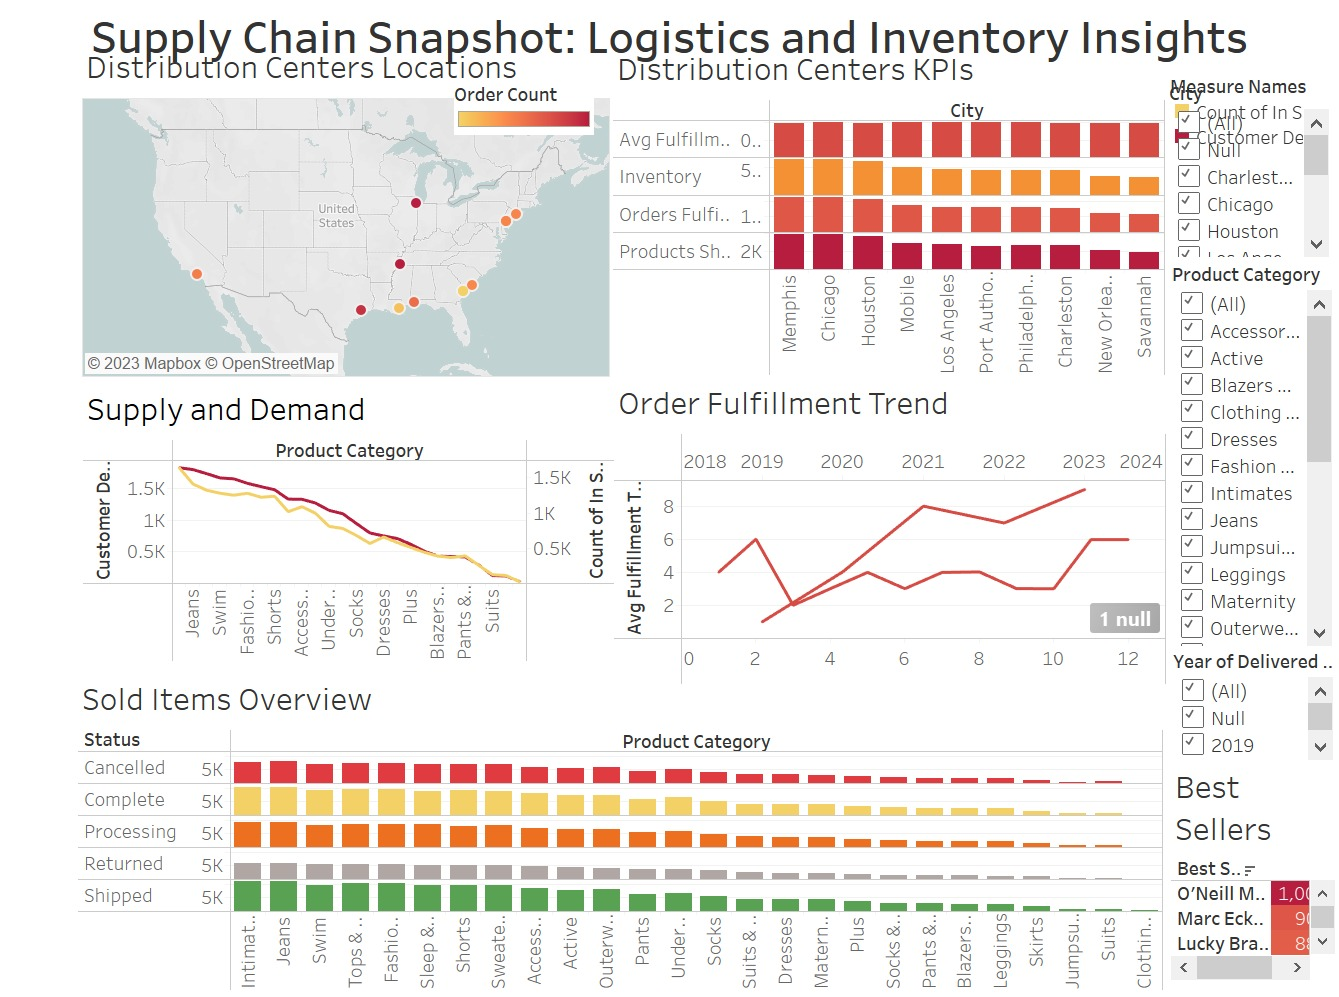

# Sales Dashboard Screenshot

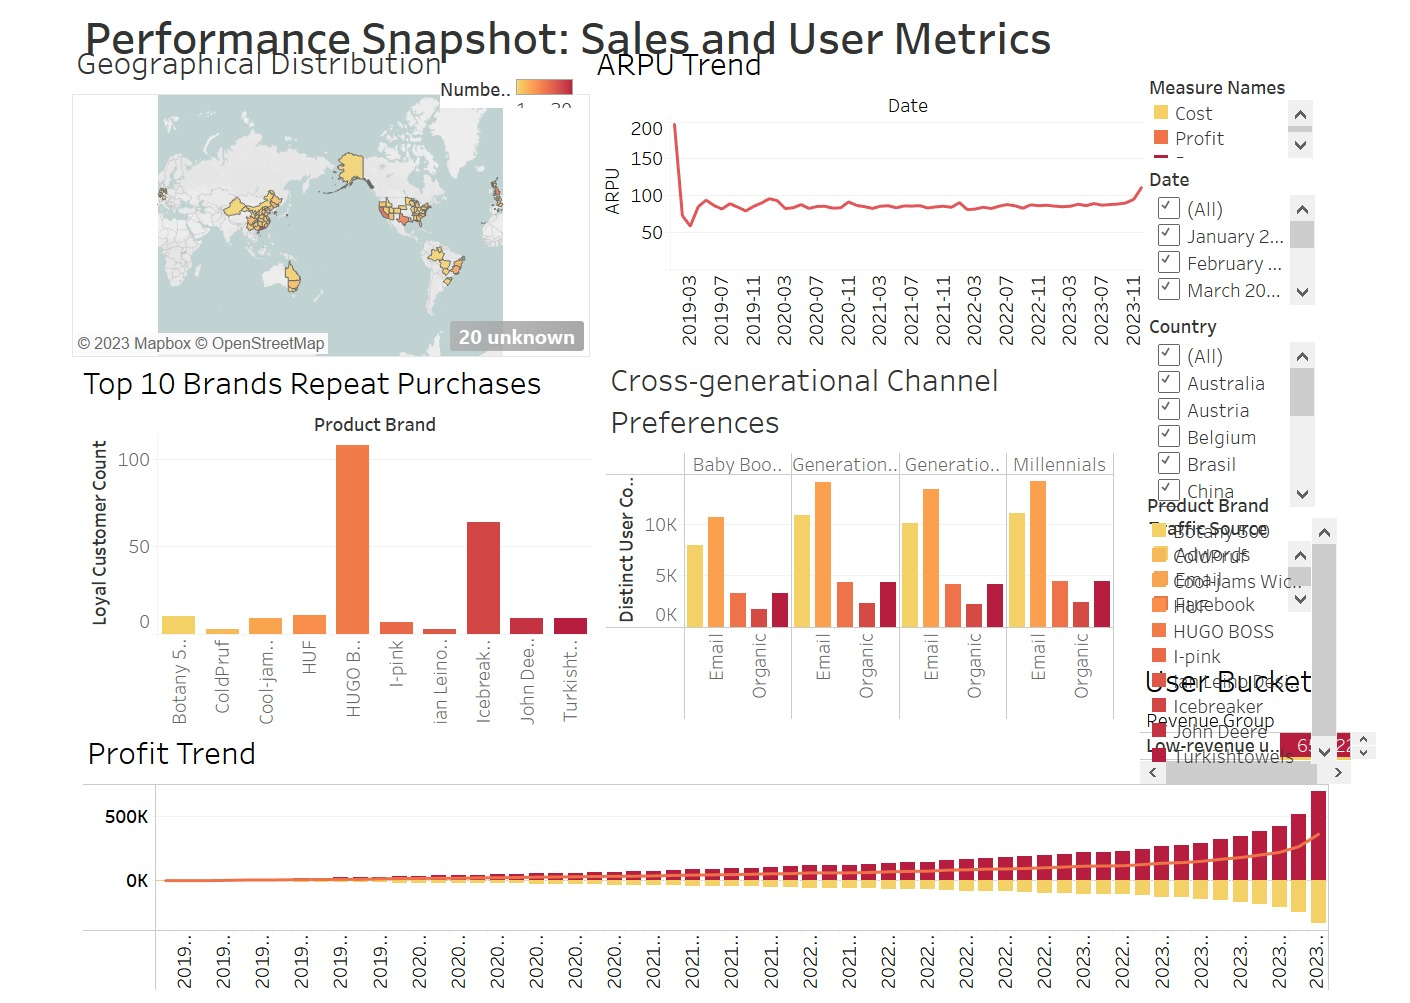

# VII. Challenges

We encountered many challenges while completing this project. Below is a list of our most significant challenges:

**Tableau Collaboration Issues:** Merging six Tableau workbooks into two dashboards posed a significant challenge for our team. Due to all the original data being linked to Google Drive, we found ourselves unable to edit the connections between each table. Consequently, we had to download the data and rebuild the workbooks independently. This process was time-consuming and required considerable effort.

**Overcoming Computational Hurdles:** Initially, we encountered a hurdle when certain intricate queries failed to execute on Colab. Consequently, we seamlessly transitioned to leveraging the robust capabilities of Vertex AI to ensure the smooth execution of our comprehensive analyses.

**Limitations of TheLook Ecommerce Dataset:** TheLook Ecommerce Dataset, creatively simulated by Google, presents a unique, albeit not real-time, perspective on data relationships. For instance, the conversion rate (from click to purchase) across all digital channels intriguingly converges around a uniform 0.075%, offering an interesting, if not entirely realistic, scenario. While this uniformity adds a touch of simplicity to the data, it also means our findings might be more theoretical in nature, serving as a splendid foundation for conceptual understanding rather than direct, real-world application.



# VIII. Conclusion

In conclusion, the comprehensive analysis of profitability, customer behavior, product/brand performance, operations, website traffic, and user demographics paints a positive picture of the company's financial health and market positioning.

The diverse user base, particularly in China, the United States, and Brazil, showcases a global online presence, and the age distribution indicates broad appeal across different demographics.

The consistent upward trend in revenue and profit suggests continued growth in 2023. The focus on Average Revenue Per User (ARPU) and user segmentation provides strategic insights for targeted marketing, the low-revenue user category dominates compared to Mid and High-revenue groups, yet the latter generate higher revenue.

Operations insights into distribution centers and order fulfillment dynamics contribute to optimizing logistical efforts. The distribution center analysis underscores their strategic importance in meeting customer demands.Chicago and Houston appeared to be pivotal hubs for order fulfillment through their efficient average fulfillment times of approximately 0.984 to 1.005 days.

While the distribution center analysis emphasizes their strategic importance in meeting customer demands, the inventory table reflects dynamic stock adjustments based on seasonal demand. Turnover analysis shows varied sales cycles, with some products selling immediately (0 days). Effective backorder management, crucial for customer satisfaction, is emphasized, especially for winter clothing products with higher backorders, emphasizing strategic inventory planning.
Top-performing brands, led by Carhartt, offer valuable market dynamics, aiding informed decision-making for product strategies.

Analyzing website traffic uncovers effective sources and conversion rates, informing new marketing strategies focusing on Millennials and Generation X. Additionally, it highlights the pivotal role of email marketing in contemporary digital strategies.Website traffic analysis reveals effective traffic sources and conversion rates, guiding new marketing strategies targeted on Millienials and GenX.

Overall, the data-driven insights provide a solid foundation for informed decision-making, enabling the company to capitalize on growth opportunities, enhance customer engagement, and refine marketing strategies for sustained success.

# IX. Business Recommendations

Our analysis allowed us to generate targeted recommendations that leverage specific insights from the provided data. Our strategies aim to enhance user engagement, drive sales, optimize inventory operations, and refine website traffic strategies for a more effective ecommerce approach.

To enhance user engagement, we propose a localized approach by creating targeted promotions for users in Shanghai and Beijing, recognizing their significant presence. We also recommend tailoring our marketing content to resonate with the '25-34', '35-44', and '45-54' age groups, as they have demonstrated higher user counts.The SQL analysis reveals Gen X and Millennials as key digital consumers. To harness their strong purchasing power and brand engagement, The Look should refine marketing strategies, focusing on platforms and messaging that resonate with these demographics.

In the sales domain, our strategy revolves around prioritizing brand-centric promotions. We suggest a focus on popular brands like Carhartt, 7 For All Mankind, and Tommy Hilfiger, offering special deals and exclusive discounts. Additionally, we advise concentrating our efforts on consistently top-performing products such as the Matix Men's Burbank Sweater and SockGuy Men's Share The Road Socks.

Turning our attention to operations and inventory management, we advocate for a dynamic approach. Adjusting inventory levels based on seasonal demand and trends is key to maintaining optimal stock levels. We emphasize the importance of focusing on efficient distribution centers, particularly in Chicago, Memphis, and Houston to streamline order fulfillment and inventory allocation. We also believe that it is worthwhile to consider an expansion of distribution centers in China, Brazil, and the UK to meet the needs of the broad user base in those locations.

In addressing website traffic, our recommendation is to craft channel-specific campaigns. Tailoring content for 'Adwords' and 'Email,' given their higher purchase rates, is crucial. To further enhance conversion rates, we propose implementing A/B testing on landing pages and promotions specific to 'Facebook' and 'YouTube'.

# X. References

OpenAI. "ChatGPT - Conversational AI Developed by OpenAI." OpenAI, 2021, https://www.openai.com/research/chatgpt.

Adjust. "Conversion Rate (CVR) - Adjust Glossary." Adjust, 2023, https://www.adjust.com/glossary/conversion-rate/.